<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Item_based_Recommendation_System_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
import string
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Book2.csv to Book2.csv


In [3]:
import io
review_df = pd.read_csv(io.BytesIO(uploaded['Book2.csv']))

In [4]:
review_df.head()


,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id
0,96,JW Marriott Atlanta Buckhead,3300 Lenox Road NE,Atlanta,Clean Room and Excellent Service,007traveler64,I enjoyed a 2 night stay here recently and wil...,5,4.0,Rs.14309,"Luxury Hotels,Hotel",6
1,325,Hotel Sorrento,900 Madison Street,Seattle,Seattle favorite,0x616e63,"Close to everything, charming, classic, modern...",5,4.0,Rs.12923,"Hotels,Corporate Lodging,Lodging,Hotel,Restaur...",16
2,9,Doubletree By Hilton West Palm Beach Airport,1808 S Australian Ave,West Palm Beach,Family first,103vanessae,"Great place great workers very friendly,clean ...",5,3.0,Rs.7548,Hotels,20
3,323,Best Western Plus Pavilions,1176 W Katella Ave,Anaheim,"Location, Comfort, Everything You Could Need",111kristens,Took a trip to Disneyland with 13 family membe...,5,1.0,Rs.10785,"Hotels Motels,Hotel",27
4,55,The St. Regis New York,Two East 55th Street at Fifth Avenue,New York,Simply Fabulous,112traveler47,"This was our second stay at the St. Regis, and...",5,5.0,Rs.86653,"Hotels,Hotel",29


In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# Investigate Data
type(review_df)
review_df.size
review_df.shape
review_df.head()
review_df.tail()

pandas.core.frame.DataFrame

64560

(5380, 12)

,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id
0,96,JW Marriott Atlanta Buckhead,3300 Lenox Road NE,Atlanta,Clean Room and Excellent Service,007traveler64,I enjoyed a 2 night stay here recently and wil...,5,4.0,Rs.14309,"Luxury Hotels,Hotel",6
1,325,Hotel Sorrento,900 Madison Street,Seattle,Seattle favorite,0x616e63,"Close to everything, charming, classic, modern...",5,4.0,Rs.12923,"Hotels,Corporate Lodging,Lodging,Hotel,Restaur...",16
2,9,Doubletree By Hilton West Palm Beach Airport,1808 S Australian Ave,West Palm Beach,Family first,103vanessae,"Great place great workers very friendly,clean ...",5,3.0,Rs.7548,Hotels,20
3,323,Best Western Plus Pavilions,1176 W Katella Ave,Anaheim,"Location, Comfort, Everything You Could Need",111kristens,Took a trip to Disneyland with 13 family membe...,5,1.0,Rs.10785,"Hotels Motels,Hotel",27
4,55,The St. Regis New York,Two East 55th Street at Fifth Avenue,New York,Simply Fabulous,112traveler47,"This was our second stay at the St. Regis, and...",5,5.0,Rs.86653,"Hotels,Hotel",29


,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,Hotel_Type,Price,Hotel_Category,User_id
5375,11,Days Inn Warren,210 Ludlow St,Warren,noisy air conditoner hotel,A verified traveler13,We could not keep the water in the shower. It ...,3,3.0,Rs.5580,Hotels,17630
5376,205,"Pier 5 Hotel Baltimore, Curio Collection by Hi...",711 Eastern Avenue,Baltimore,Nice location,A verified traveler13,We were very pleased with the room and thought...,5,3.0,Rs.11614,"Hotel,Hotels,Hotels Motels,Wedding Sites,Meeti...",17630
5377,207,"The Brookshire Suites Inner Harbor, BW Premier...",120 E Lombard St,Baltimore,Nice close to inner harbor.,A verified traveler13,We visited to be close to the theatre and inne...,4,3.0,Rs.7801,"Hotels,Hotel,Lodging,Hotels Motels,Family-frie...",17630
5378,305,"The Virginian Suites, an Ascend Hotel Collecti...",1500 Arlington Blvd,Arlington,"Great Place, terrible service",A verified traveler13,For the location and price this place is a dia...,4,3.0,Rs.7571,"Hotels,Lodging,Hotel,Hotels and motels",17630
5379,413,Holiday Inn Express Prince Frederick,355 Merrimac Ct,Prince Frederick,winter layover,A verified traveler13,"easy to find ,,,,, great stay",5,3.0,Rs.7403,"Hotels,Hotel",17630


In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hotel_id        5380 non-null   int64  
 1   Hotel           5380 non-null   object 
 2   Address         5380 non-null   object 
 3   City            5380 non-null   object 
 4   Title           5370 non-null   object 
 5   Users           5380 non-null   object 
 6   Reviews         5380 non-null   object 
 7   Rating          5380 non-null   int64  
 8   Hotel_Type      5073 non-null   float64
 9   Price           4805 non-null   object 
 10  Hotel_Category  5380 non-null   object 
 11  User_id         5380 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 504.5+ KB


In [8]:
review_df['Hotel'].unique()


array(['JW Marriott Atlanta Buckhead', 'Hotel Sorrento',
       'Doubletree By Hilton West Palm Beach Airport',
       'Best Western Plus Pavilions', 'The St. Regis New York',
       'The College Club of Boston',
       'Hilton Garden Inn Burlington Downtown',
       'Doubletree By Hilton Hotel Bay City - Riverfront',
       'The Annex at The Chelsea', 'Days Inn & Suites Milwaukee Airport',
       'Wyndham Garden Chinatown', 'Best Western Plus Bayside Inn',
       'Orchid Key Inn', 'Holiday Inn Express New York City Times Square',
       'Chicago Marriott at Medical District/UIC',
       'Microtel Inn & Suites By Wyndham Shelbyville',
       'My Place Hotel-rock Springs, Wy', 'Tradewinds Restaurant',
       "The Westin Nanea Ocean Villas, Ka'anapali",
       'Solstice Motorcoach Resort',
       'Homewood Suites by Hilton Lake Buena Vista-Orlando',
       'Hyatt Centric Waikiki Beach', 'Columbus Motor Inn',
       'Fairfield Inn & Suites by Marriott Key West at The Keys Collection',
   

In [9]:
review_df.Rating.value_counts()

5    2373
4    1596
3     759
2     331
1     321
Name: Rating, dtype: int64

In [10]:
print("Mean rating : {}".format(review_df['Rating'].mean()))
print("Mean rating standard deviation: {}".format(review_df['Rating'].std()))

Mean rating : 3.9979553903345724
Mean rating standard deviation: 1.1685423672439952


(array([ 321.,    0.,  331.,    0.,  759.,    0., 1596.,    0., 2373.]),
 array([0.9, 1.1, 1.9, 2.1, 2.9, 3.1, 3.9, 4.1, 4.9, 5.1]),
 <a list of 9 Patch objects>)

Text(0.5, 0, 'Rating of review')

Text(0, 0.5, 'count of reviews')

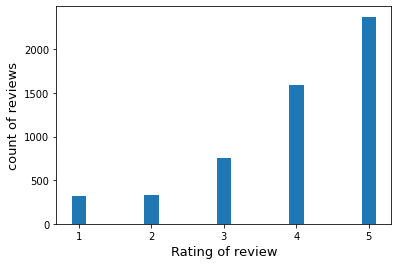

In [11]:
fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
ax.hist(review_df['Rating'], bins=[0.9, 1.1, 1.9, 2.1, 2.9, 3.1, 3.9, 4.1, 4.9, 5.1])
ax.set_xlabel('Rating of review', fontsize=13)
ax.set_ylabel('count of reviews', fontsize=13)
#ax.title('Distribution of reviews', fontsize=15)

In [12]:
for index,text in enumerate(review_df['Reviews']):
  print('Review %d:\n'%(index+1),text)


Streaming output truncated to the last 5000 lines.
 Loved our stay at this hotel. The room was large and it had a microwave and a refrigerator. The location was right near Little Italy so there were plenty of eating options. It was only a short walk to the harbour, shopping centre, Gaslamp Quarter and trolley stops. The pool was nice and seldom used by the guests. We found it refreshing after sightseeing, as the tempereature when we were there was very hot. The rates of the hotel were also reasonable.The bed in the room was the most comfortable that I had slept in during our travels on the west coast. I would highly recommend this hotel to anyone going to San Diego.Thank you for choosing to stay with us at Best Western Plus Bayside Inn. Thank you for highly recommending our hotel. We are please you felt our location is convenient to many things you experienced while in San Diego. Thank you for your feedback about our large rooms with microwaves and refrigerators. We try to ensure our g

In [13]:
corpus = [] 

In [14]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
review_df['Reviews']=review_df['Reviews'].apply(lambda x:expand_contractions(x))

In [15]:
#Tokenization of the sentences

from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
print(tokens)


['easy', 'to', 'find', ',', ',', ',', ',', ',', 'great', 'stay']


In [16]:
#Lowercase the reviews
review_df['cleaned']=review_df['Reviews'].apply(lambda x: x.lower())


In [17]:
#Remove digits and words containing digits
review_df['cleaned']=review_df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [18]:
#Remove Punctuations
review_df['cleaned']=review_df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [19]:
# Removing extra spaces
review_df['cleaned']=review_df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [20]:
#Reviews after cleaning
for index,text in enumerate(review_df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 i went into the dark room and the lights did nothing to brighten it up also when i drove up i thought the place was deserted and shut down i turned around and lefteven though i was losing over 
Review 2:
 found the motel via tripadvisor i can imagine this used to be an ordinary motel which later was later upgraded to a boutique hotel the owners have added lots of taste in terms furniture bathroom amenities pool areacombined bar highly recommendedon behalf of the entire pearl management and staff thank you for taking the time to leave a kind and detailed review we truly appreciate it
Review 3:
 we had a private chef over for my husbands birthday and the kitchen amenities and room view did not disappoint it was comfortable for six people and the hotel had a high chair for our toddler to use throughout the trip room cleaning service was prompt daily and proactively called to see if we needed service on the one day we stayed in thank you aloha wow what an amazing experience i am

In [21]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
review_df['lemmatized']=review_df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))



In [22]:
corpus.append(review_df['cleaned'])

In [23]:
corpus[0:10]

[0       i enjoyed a night stay here recently and will ...
 1       close to everything charming classic modern el...
 2       great place great workers very friendlyclean w...
 3       took a trip to disneyland with family members ...
 4       this was our second stay at the st regis and t...
                               ...                        
 5375    we could not keep the water in the shower it h...
 5376    we were very pleased with the room and thought...
 5377    we visited to be close to the theatre and inne...
 5378    for the location and price this place is a dia...
 5379                              easy to find great stay
 Name: cleaned, Length: 5380, dtype: object]

In [24]:
df_grouped=review_df[['Hotel','lemmatized']].groupby(by='Hotel').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
Hotel,
Alamar Resort Inn,send flower special stay tina go help deliver ...
Aloft Atlanta Downtown,ms chassity polite helpful hurry understand ch...
Aloft Detroit at The David Whitney,aloft whitney good location detroit staff frie...
Aloft Jacksonville Tapestry Park,look nice hotel stay couple day want dog trip ...
Aloft Philadelphia Downtown,great stay hotel staff wonderful hotel close c...


In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aaa,ability,able,abri,absolute,absolutely,ac,accept,acceptable,access,accessible,accommodate,accommodating,accommodation,accomodate,accomodation,accomplish,account,acknowledge,act,action,activity,actual,actually,add,addition,additional,address,adequate,adjacent,adjoin,adjoining,adjust,adjustment,admit,adult,advance,advantage,adventure,advertise,...,wind,window,wine,wing,winter,winthrop,wipe,wireless,wise,wish,woman,wonder,wonderful,wonderfully,wood,word,work,worker,workout,world,worn,worried,worry,worth,would,wow,wrap,write,wrong,wyndham,yard,year,yell,yes,yogurt,york,young,yummy,zero,zoo
Hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alamar Resort Inn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aloft Atlanta Downtown,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
Aloft Detroit at The David Whitney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
data=vectorizer.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=vectorizer.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaa,aaaa,aaaaarp,aan,aanwezig,aaron,aarp,aback,abandon,abbiamo,abc,abd,aberdeen,abide,abilene,ability,able,ablemore,abound,aboutmore,aboutstaff,abouttick,aboveandbeyond,aboveaverage,abri,abris,abroad,abrupt,absecon,absence,absent,absolute,absolutely,absorb,absorbent,absurd,absurdly,abundance,abysmal,...,yourselfdear,yourselfhave,yousincerelyeric,youth,youthank,youthe,youthere,youwe,youwhen,youwith,yoyomass,yqbettyboopmahalo,yr,yrs,ysidro,yuck,yuckbe,yuk,yukon,yum,yummer,yummy,yup,zabriskiboundthank,zapper,zero,ziegenbock,zijn,zion,zip,zipped,zlbenitesthank,zonas,zone,zoo,zoobalboa,zoobreakfast,zoom,â½cor,â½ã
Hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alamar Resort Inn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aloft Atlanta Downtown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019646,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aloft Detroit at The David Whitney,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,hotel in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[hotel].sort_values(ascending=False),hotel)

ZeroDivisionError: ignored

In [28]:
#Checking the polarity of the Reviews
from textblob import TextBlob
review_df['polarity']=review_df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [29]:
#Checking the highest polarity of reviews

print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(review_df.iloc[review_df['polarity'].sort_values(ascending=False)[:3].index]['Reviews']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 Another awesome weekend in Salina, KS for concerts at The Stiefel Theatre.
Review 2:
 this was an awesome stay.  we had a fireplace in our room and i did laundry....the have 3 washers and 6 dryers...not one of each like most hotels.  awesome stay.
Review 3:
 I wanted to highlight the staff at this hotel. From checkin to checkout every experience was perfect. In my case it went one step further when I left my wallet/money clip with money sitting on the end table in the entrance way. Not only did they grab it for me but it also came back with all my money. The... More


In [30]:
#Checking the lowest polarity of reviews

print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(review_df.iloc[review_df['polarity'].sort_values(ascending=True)[:3].index]['Reviews']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Horrible place to stay...never again
Review 2:
 Looks nothing like the pictures on line, terrible hotel
Review 3:
 Terrible hotel service. I booked through hotels.com and when I got to the hotel, the guy at desk said that the rooms were sold out. Then when customer service called him for a refund, the guy was nowhere to be found. Terrible service. Will not go to this location again.


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Polarity')

Text(0, 0.5, 'Hotels')

Text(0.5, 1.0, 'Polarity of Different Hotel Reviews')

Text(0.005, -1.1, 'Knights Inn-murfreesboro')

Text(0.005, 0.09999999999999998, 'Americas Best Value Inn - Medical Center / Lubbock')

Text(0.005, 1.3036904761904764, 'Budget Inn')

Text(0.005, 2.3523809523809525, 'Comfort Suites University Area')

Text(0.005, 3.3602083333333335, 'Rodeway Inn')

Text(0.005, 4.375, 'Budgethost Inn')

Text(0.005, 5.388095238095238, 'River Rock Hotel')

Text(0.005, 6.449999999999999, 'Best Western Of Alexandria Inn & Suites & Conference Center')

Text(0.005, 7.4686147186147185, 'Crossland Economy Studios-phoenix-west')

Text(0.005, 8.473518518518517, "America's Best Value Inn")

Text(0.005, 9.5, 'Best Western Plus Classic Inn Suites')

Text(0.005, 10.53125, 'Red Roof Inn')

Text(0.005, 11.553125, 'Pioneer Lodge')

Text(0.005, 12.5625, 'Village Inn Motel')

Text(0.005, 13.566666666666666, 'Super 8 Fairview Heights, St. Louis')

Text(0.005, 14.578856304985337, 'Economy Inn')

Text(0.005, 15.598262921422013, 'Civic Center Inn')

Text(0.005, 16.6, 'Americas Best Value Inn - Greeley/Evans')

Text(0.005, 17.6, 'WoodSpring Suites Jackson South')

Text(0.005, 18.6, 'Apple Tree Inn')

Text(0.005, 19.6, 'Budget Inn North Kingstown')

Text(0.005, 20.6, 'The Eastland Hotel')

Text(0.005, 21.6, 'Pavilion Inn')

Text(0.005, 22.6, 'Wingate by Wyndham - Joliet')

Text(0.005, 23.6, 'Residence Inn Cincinnati Airport')

Text(0.005, 24.6, 'Best Western Riverside Inn')

Text(0.005, 25.6, 'Days Inn-buckeye')

Text(0.005, 26.6, 'Days Inn-Ku Lawrence')

Text(0.005, 27.611111111111114, 'Days Inn Princeton')

Text(0.005, 28.613259259259262, 'Super 8')

Text(0.005, 29.625, 'Hampton Inn Lancaster')

Text(0.005, 30.633928571428573, 'Loggerhead Inn')

Text(0.005, 31.63527777777778, 'Ramada Mesa Phoenix East Area')

Text(0.005, 32.65, 'Best Western Logan Inn')

Text(0.005, 33.651875000000004, 'Red Roof Inn Fresno - Yosemite Gateway')

Text(0.005, 34.65876159554731, 'Bluegreen Vacations Patrick Henry Sqr, Ascend Resort Collection')

Text(0.005, 35.66627553558051, 'The Annex at The Chelsea')

Text(0.005, 36.66666666666667, 'Anglers Inn')

Text(0.005, 37.67538690476191, "Top's Motel")

Text(0.005, 38.68044104149218, 'Super 8 Columbia Dwntwn Sc')

Text(0.005, 39.681666666666665, 'Key West Inn')

Text(0.005, 40.68414502164502, 'Econo Lodge Inn and Suites')

Text(0.005, 41.685296846011134, 'Ocean Breeze Motel Apts')

Text(0.005, 42.69049603174604, 'Days Inn & Suites Milwaukee Airport')

Text(0.005, 43.69107142857143, 'Daniel Boone Motor Inn')

Text(0.005, 44.69166666666667, 'Best Western Appleton Inn')

Text(0.005, 45.69166666666667, 'The Bunkhouse Lodge')

Text(0.005, 46.69375, 'Hampton Inn Carrollton')

Text(0.005, 47.69583333333333, 'Hilton Garden Inn Chicago/Oakbrook Terrace')

Text(0.005, 48.7, 'Best Western Eden Prairie Inn')

Text(0.005, 49.7, 'Quincy Inn and Suites')

Text(0.005, 50.7, 'Pine Point Lodge')

Text(0.005, 51.7, 'Rodeway Inn Suites')

Text(0.005, 52.7, 'Siesta Motel')

Text(0.005, 53.702083333333334, 'Central Park West Hostel')

Text(0.005, 54.702777777777776, 'Groveland Hotel')

Text(0.005, 55.70290577274033, 'Days Inn Brookings')

Text(0.005, 56.708125, 'Charleston Plaza Hotel')

Text(0.005, 57.708326569264074, 'Litson Villas')

Text(0.005, 58.71235795454545, 'Courtyard Ogden')

Text(0.005, 59.71388888888889, 'Motel 6 Naperville')

Text(0.005, 60.714285714285715, 'Travelodge Los Banos')

Text(0.005, 61.71607142857143, 'The Summit Of Gatlinburg')

Text(0.005, 62.72012750386784, 'Ambassadors Inn and Suites')

Text(0.005, 63.72083333333333, 'Econo Lodge Inn Suites Near Legoland')

Text(0.005, 64.7292619047619, 'Best Western Black Hills Lodge')

Text(0.005, 65.73035714285713, 'Home2 Suites by Hilton Salt Lake City / West Valley City, UT')

Text(0.005, 66.7330357142857, 'Coronado Island Inn')

Text(0.005, 67.73375, 'Hotel Galaxy')

Text(0.005, 68.73935011943486, 'Extended Stay America - Chicago - Westmont - Oak Brook')

Text(0.005, 69.74166666666666, 'Motel 6 Ardmore')

Text(0.005, 70.74285714285713, 'Historic Hotel Bethlehem')

Text(0.005, 71.74374999999999, 'Magnuson Hotel Nashville North')

Text(0.005, 72.7453418109668, 'Best Western-valencia Inn')

Text(0.005, 73.7453869047619, 'Sheraton Portland Airport Hotel')

Text(0.005, 74.74751388888889, 'Hampton Inn and Suites Williamsburg-Central')

Text(0.005, 75.74762396694214, 'Americas Best Value Inn & Suites Canon City')

Text(0.005, 76.74838522588522, 'The Westin Chicago River North')

Text(0.005, 77.75061026936027, 'Minna Hotel')

Text(0.005, 78.75248282967033, 'Fairfield Inn and Suites by Marriott Virginia Beach Oceanfront')

Text(0.005, 79.75397054999192, 'Nob Hill Hotel')

Text(0.005, 80.7549006889168, 'Lemon Tree Hotel Suites')

Text(0.005, 81.75535714285714, 'Six South St Hotel')

Text(0.005, 82.75704545454545, 'Canyons Boutique Hotel, a Canyons Collection Property')

Text(0.005, 83.75999999999999, 'Ashland Motel')

Text(0.005, 84.76333333333332, 'Mountvernon Motel')

Text(0.005, 85.76877893518518, 'Best Western Sandman Motel')

Text(0.005, 86.77335819231273, 'La Cuesta Inn')

Text(0.005, 87.77493927368927, 'The Cub Motel')

Text(0.005, 88.77559523809524, 'National Trail Motel')

Text(0.005, 89.77769841269841, 'Hampton Inn & Suites Fremont')

Text(0.005, 90.77867277187707, 'Howard Johnson Inn Columbia')

Text(0.005, 91.77990476190476, 'Candlewood Suites Somerset')

Text(0.005, 92.78191107503606, 'Janmere Motel')

Text(0.005, 93.78333333333333, 'The Pines Lodge, A RockResort')

Text(0.005, 94.78333333333333, 'Halcyon Hotel')

Text(0.005, 95.78400488400487, 'Wedge Mountain Inn')

Text(0.005, 96.78464838016238, 'The Francisco Bay Inn')

Text(0.005, 97.78492035883617, 'Home2 Suites by Hilton Erie, PA')

Text(0.005, 98.78625541125541, 'Western Inn Motel')

Text(0.005, 99.78666666666666, 'Comfort Inn Suites')

Text(0.005, 100.78878787878787, 'La Quinta')

Text(0.005, 101.78999999999999, 'Juniper Springs Resort')

Text(0.005, 102.7912481924588, 'Hampton Inn and Suites Baltimore Inner Harbor')

Text(0.005, 103.79166666666666, 'El Toro Motel')

Text(0.005, 104.79166666666666, 'WoodSpring Suites Virginia Beach')

Text(0.005, 105.79357638888888, 'WoodSpring Suites Allentown')

Text(0.005, 106.79462797619047, 'Motel 6 Lawrence Ks')

Text(0.005, 107.79771582785112, 'The Monarch Hotel')

Text(0.005, 108.79933534200116, 'Chablis Inn')

Text(0.005, 109.8, 'The Baroness Hotel')

Text(0.005, 110.80015873015873, 'Country Lodge Motel')

Text(0.005, 111.80055555555555, 'Quality Inn Suites')

Text(0.005, 112.80262373737374, 'Pear Tree Inn St. Louis Near Union Station')

Text(0.005, 113.80456428238021, 'Greenwich Inn')

Text(0.005, 114.80500992063492, 'Royal Inn-hudson')

Text(0.005, 115.80624999999999, 'Park Motel')

Text(0.005, 116.8078125, 'Best Western Plus Nashville Airport Hotel')

Text(0.005, 117.80785233285232, 'Red Roof Inn & Suites Muskegon Heights')

Text(0.005, 118.81041666666665, 'Best Western Plus The Inn Suites at Muskogee')

Text(0.005, 119.81238095238095, 'North Port Motel')

Text(0.005, 120.81364583333333, 'Baymont Inn & Suites Goodlettsville')

Text(0.005, 121.81468749999999, 'The Dunes On The Waterfront')

Text(0.005, 122.8148797925721, 'Buena Vista Motor Inn')

Text(0.005, 123.81666666666666, 'Crossland Economy Studios Tacoma - Puyallup')

Text(0.005, 124.81666666666666, 'Best Western Tolleson Hotel')

Text(0.005, 125.81760693258461, 'The Boxer')

Text(0.005, 126.81799242424242, 'Motel 6 Tupelo')

Text(0.005, 127.81816399817502, 'Holiday Inn Express Prince Frederick')

Text(0.005, 128.82, 'Hampton Inn Galax')

Text(0.005, 129.8205633094717, 'The National Conference Center')

Text(0.005, 130.82381593081223, 'Days Inn Branson / Near The Strip')

Text(0.005, 131.82393919822195, 'Sf Plaza Hotel')

Text(0.005, 132.82777777777778, 'Red Carpet Inn')

Text(0.005, 133.82833333333332, 'Crossland Economy Studios Shreveport - Bossier City')

Text(0.005, 134.82854785954785, 'Best Western Owasso Inn & Suites')

Text(0.005, 135.83150245993184, 'Bridgetown Mill House Restaurant Inn')

Text(0.005, 136.83333333333331, 'Quality Inn Suites Oceanside Near Camp Pendleton')

Text(0.005, 137.83398097273096, 'Hometown Inn')

Text(0.005, 138.83483703862845, 'Inn At Queen Anne')

Text(0.005, 139.83525144300143, 'Pacific Inn')

Text(0.005, 140.8375, 'Hampton Inn Savannah-I-95/Richmond Hill')

Text(0.005, 141.8375, 'Courtyard Atlanta Airport South/Sullivan Road')

Text(0.005, 142.83785439965126, 'Holiday Inn Express & Suites Lenoir City (knoxville Area)')

Text(0.005, 143.83841145833333, 'Comfort Inn')

Text(0.005, 144.83880149281936, 'Hilton Garden Inn Williamsburg')

Text(0.005, 145.83939393939394, 'Americas Best Value Inn-north Capital')

Text(0.005, 146.84010416666666, 'Bullock Hotel')

Text(0.005, 147.84027777777777, 'Best Western Executive Inn Suites')

Text(0.005, 148.84170524691356, 'Hyatt Regency-valencia')

Text(0.005, 149.84265873015872, 'Capri Motel')

Text(0.005, 150.8459163059163, 'Courtyard by Marriott Sioux Falls')

Text(0.005, 151.8491515151515, 'Holiday Inn Express & Suites Lakeland North - I-4')

Text(0.005, 152.85, 'Sheraton Gateway Los Angeles Hotel')

Text(0.005, 153.85047619047617, 'Days Inn Seattle North Of Downtown')

Text(0.005, 154.85063560777846, 'Hotel Sausalito')

Text(0.005, 155.85333333333332, 'Chalet Motel')

Text(0.005, 156.8540633116883, 'The Point')

Text(0.005, 157.85416666666666, 'Hiway House Motel')

Text(0.005, 158.85425706294703, 'Super 8 Ithaca')

Text(0.005, 159.85555555555555, 'Best Western Harker Heights')

Text(0.005, 160.8560768325005, 'The College Club of Boston')

Text(0.005, 161.85746527777778, 'Extended Stay America-salt Lake City-union Park')

Text(0.005, 162.85833333333332, 'Chalet High Resort')

Text(0.005, 163.85906527372853, 'Best Western Plus Bandana Square')

Text(0.005, 164.859375, 'Hampton Inn-longmont')

Text(0.005, 165.85969413218092, 'Kinzie Hotel')

Text(0.005, 166.85999999999999, 'Shalimar Cottages Motel')

Text(0.005, 167.86147025813693, 'Royal Pacific Motor Inn')

Text(0.005, 168.863121768278, 'Delano Las Vegas')

Text(0.005, 169.86436432473423, 'Grand Imperial Hotel')

Text(0.005, 170.86458389409566, 'Pier 5 Hotel Baltimore, Curio Collection by Hilton')

Text(0.005, 171.8647652527216, 'Aloft Atlanta Downtown')

Text(0.005, 172.86666666666667, 'Fairfield Inn Suites Austin-University Area')

Text(0.005, 173.86889173326674, 'The Hotel of South Beach')

Text(0.005, 174.8693181818182, 'Kai Aloha Apartment Hotel')

Text(0.005, 175.87023809523808, 'Best Western Plus Cutting Horse Inn Suites')

Text(0.005, 176.87031249999998, 'Browns Hill Tavern Motel')

Text(0.005, 177.87108535095857, 'Hilton Garden Inn Burlington Downtown')

Text(0.005, 178.8722222222222, 'M-Star Cedar City')

Text(0.005, 179.87327980415168, 'Renaissance Atlanta Waverly Hotel & Convention Center')

Text(0.005, 180.8736111111111, 'Hampton Inn Suites Cincinnati/Uptown-University Area')

Text(0.005, 181.8736607142857, 'Holiday Inn Express')

Text(0.005, 182.87446635251322, 'Best Western Inn & Suites At Discovery Kingdom')

Text(0.005, 183.87496710919828, 'Holiday Inn Express New York City Times Square')

Text(0.005, 184.8774963924964, 'Westgate Inn & Suites')

Text(0.005, 185.88054201287065, 'The Virginian Suites, an Ascend Hotel Collection Member')

Text(0.005, 186.881104713762, 'Hotel Rex San Francisco')

Text(0.005, 187.88130092592593, 'Aloft Jacksonville Tapestry Park')

Text(0.005, 188.88141815387772, 'SpringHill Suites by Marriott Virginia Beach Oceanfront')

Text(0.005, 189.88294933684242, 'Homewood Suites by Hilton Lake Buena Vista-Orlando')

Text(0.005, 190.88369633838383, 'Hotel Sutter')

Text(0.005, 191.8844303936804, 'Homewood Suites by Hilton Baltimore')

Text(0.005, 192.88458333333332, 'Best Western Plus Cascade Inn & Suites')

Text(0.005, 193.88511904761904, 'Best Western Brentwood')

Text(0.005, 194.8874531099457, 'Four Points by Sheraton Miami Beach')

Text(0.005, 195.88760470389747, 'Hotel Vertigo')

Text(0.005, 196.89130983267557, 'Chicago Marriott at Medical District/UIC')

Text(0.005, 197.89202896825395, 'Holiday Inn Express & Suites Florence I-95 & I-20 Civic Ctr')

Text(0.005, 198.8922377243086, 'Residence Inn by Marriott Dallas Market Center')

Text(0.005, 199.89239461716733, 'Hampton Inn Suites Orangeburg')

Text(0.005, 200.8926160960252, 'Aloft Detroit at The David Whitney')

Text(0.005, 201.89430555555555, 'Comfort Inn I-10 West at 51st Ave')

Text(0.005, 202.89643695553417, 'Sea Shore Motel')

Text(0.005, 203.8967436892112, 'Econo Lodge St Robert')

Text(0.005, 204.89682791194988, 'Tryp Dusseldorf Krefeld Hotel')

Text(0.005, 205.89799279124023, 'Hotel Abri')

Text(0.005, 206.89848484848486, 'Travel Inn')

Text(0.005, 207.90017195767194, 'Beachcomber By The Sea')

Text(0.005, 208.90122389570305, 'Radisson Hotel Freehold')

Text(0.005, 209.90151515151516, 'Comfort Inn-lone Pine')

Text(0.005, 210.9021740840827, 'La Quinta Inn and Suites Tucson - Reid Park')

Text(0.005, 211.90450421100488, 'Courtyard by Marriott San Diego Old Town')

Text(0.005, 212.90685064935064, 'My Place Hotel-rock Springs, Wy')

Text(0.005, 213.9073578042328, 'Residence Inn Sacramento Airport Natomas')

Text(0.005, 214.9080843222869, 'Quality Inn')

Text(0.005, 215.9102660374756, 'Country Inn and Suites By Carlson Corbin')

Text(0.005, 216.9106300929906, 'The St. Regis New York')

Text(0.005, 217.91117424242424, 'Best Western Plus Stevens County Inn')

Text(0.005, 218.91169537533173, 'The Brookshire Suites Inner Harbor, BW Premier Collection')

Text(0.005, 219.91217607542143, 'Days Inn Warren')

Text(0.005, 220.9125, 'Best Western Plus Swiss Chalet Hotel Suites')

Text(0.005, 221.9125, 'Americas Best Value Inn Suburban Motel')

Text(0.005, 222.9145778566222, 'W Seattle')

Text(0.005, 223.91470486111112, 'Hampton Inn Memphis/Southaven')

Text(0.005, 224.91485317460317, 'BEST WESTERN Garden Inn')

Text(0.005, 225.91666666666666, 'Wyndham Garden Midland')

Text(0.005, 226.91682150078043, 'Best Western Plus Arlington North Hotel and Suites')

Text(0.005, 227.91770833333334, 'Golden West Motel')

Text(0.005, 228.91875, 'Hampton Inn & Suites Grenada')

Text(0.005, 229.91875, 'Song of the Sea')

Text(0.005, 230.91891143974567, 'Best Western Plus Bayside Inn')

Text(0.005, 231.91935003488575, 'Wyndham Resort At Fairfield Mountains')

Text(0.005, 232.92033333333333, 'Hampton Inn-lindale/tyler')

Text(0.005, 233.92142857142858, 'Coconut Palm Inn')

Text(0.005, 234.92395833333333, 'Americas Best Value Inn Pryor')

Text(0.005, 235.92414892285132, 'Fairfield Inn & Suites by Marriott Key West at The Keys Collection')

Text(0.005, 236.92452751101945, 'Quality Inn & Suites')

Text(0.005, 237.92499999999998, 'Best Western Plus Rama Inn Suites')

Text(0.005, 238.92510925960835, 'Best Western Mission Bay')

Text(0.005, 239.92582656926407, 'Comfort Suites')

Text(0.005, 240.92666338386135, 'La Quinta Inn & Suites Auburn')

Text(0.005, 241.9284632034632, 'Best Western Of Whitmore Lake')

Text(0.005, 242.92916666666667, 'TownePlace Suites Seattle Everett/Mukilteo')

Text(0.005, 243.9294252867869, 'Best Western Plus Hacienda Hotel Old Town')

Text(0.005, 244.92947916666665, 'Sea Oats Motel')

Text(0.005, 245.92979627368516, 'Pacific View Inn')

Text(0.005, 246.9298088026835, 'The Pearl Hotel')

Text(0.005, 247.93048379200164, 'Best Western Plus Lake Front Hotel')

Text(0.005, 248.93055555555554, 'Americas Best Value Inn-east Syracuse')

Text(0.005, 249.9308201058201, 'Best Western Clermont')

Text(0.005, 250.93083333333334, 'Quality Inn-rexburg')

Text(0.005, 251.9319170604023, 'Orchid Key Inn')

Text(0.005, 252.93287638287637, 'Drury Inn Suites Sikeston')

Text(0.005, 253.9331447627617, 'Doubletree By Hilton West Palm Beach Airport')

Text(0.005, 254.93333333333334, 'Residence Inn by Marriott New York The Bronx at Metro Center Atrium')

Text(0.005, 255.93355420535244, 'Best Western Lamplighter Inn Suites at SDSU')

Text(0.005, 256.93376837954816, 'Residence Inn Billings')

Text(0.005, 257.93387445887447, 'Bricco Suites')

Text(0.005, 258.9348245879043, 'Best Western Plus Pavilions')

Text(0.005, 259.938475289787, 'Hampton Inn & Suites St. Louis/South I-55')

Text(0.005, 260.9385416666667, 'Days Inn-ellis')

Text(0.005, 261.9385576975264, 'Springhill Suites Columbia')

Text(0.005, 262.939193877551, 'Residence Inn Naples')

Text(0.005, 263.93928571428575, 'The London West Hollywood at Beverly Hills')

Text(0.005, 264.94, 'Best Western Marble Falls Inn')

Text(0.005, 265.9401695526696, "Harvey's Motel")

Text(0.005, 266.9409090909091, 'Chebeague Island Inn')

Text(0.005, 267.94099702380953, 'Homewood Suites by Hilton Saratoga Springs')

Text(0.005, 268.94134920634923, 'Blue Sands Motel')

Text(0.005, 269.94136904761905, 'Hampton Inn Lebanon')

Text(0.005, 270.94288910934745, 'Hampton Inn Suites Bremerton')

Text(0.005, 271.94306837593626, 'Mt Gardner Inn')

Text(0.005, 272.94344897959184, 'La Quinta Inn Suites San Antonio Northwest')

Text(0.005, 273.9438892513908, 'JW Marriott Atlanta Buckhead')

Text(0.005, 274.94444444444446, 'Residence Inn By Marriott Denver Cherry Creek')

Text(0.005, 275.94476190476195, 'Hilton Garden Inn Lincoln Downtown Haymarket')

Text(0.005, 276.9458333333334, 'Best Western Springfield')

Text(0.005, 277.9459077380953, 'Best Western Pasadena Royale')

Text(0.005, 278.9459532828283, 'Courtyard Richland Columbia Point')

Text(0.005, 279.94621212121217, 'Hilton Garden Inn Myrtle Beach/Coastal Grand Mall')

Text(0.005, 280.947238524838, 'Quality Inn Spearfish')

Text(0.005, 281.9472667112796, 'Columbus Motor Inn')

Text(0.005, 282.9478174603175, 'Best Western Plus Concordville Hotel')

Text(0.005, 283.9482142857143, 'Hampton Inn & Suites Bradenton Downtown Historic District')

Text(0.005, 284.94835760882637, 'The Inn @ St. Botolph')

Text(0.005, 285.94964285714286, 'Fairfield Inn by Marriott Owensboro')

Text(0.005, 286.94980158730164, 'The Roxbury Motel')

Text(0.005, 287.95000000000005, 'Lexington Inn At Jfk Airport')

Text(0.005, 288.9501262559769, 'Ocean Park Inn')

Text(0.005, 289.95107006822366, 'Hilton Garden Inn Atlanta Midtown')

Text(0.005, 290.95145833333333, 'Howard Johnson')

Text(0.005, 291.9515211640212, 'Staybridge Suites Rockford')

Text(0.005, 292.95208333333335, 'Hilltop Motel')

Text(0.005, 293.9521494260443, 'Honua Kai Resort Spa')

Text(0.005, 294.9533333333334, 'Econolodge')

Text(0.005, 295.9535714285715, 'Best Western Sunland Park Inn')

Text(0.005, 296.95389164462085, 'Hyatt Place Dallas/Las Colinas')

Text(0.005, 297.9550690749088, 'The Orchard Garden Hotel')

Text(0.005, 298.9555083458209, 'Residence Inn by Marriott Dallas Central Expressway')

Text(0.005, 299.9555555555556, 'Hampton Inn Springfield South')

Text(0.005, 300.9564903846154, 'Best Western Plus Ruidoso Inn')

Text(0.005, 301.95709531359694, 'Fairfield Inn & Suites by Marriott Destin')

Text(0.005, 302.9575757575758, 'Embassy Suites by Hilton Philadelphia - Center City')

Text(0.005, 303.95790392258306, 'Residence Inn By Marriott Irvine John Wayne Airport')

Text(0.005, 304.9589743589744, 'Hearthside Village Cottage Motel')

Text(0.005, 305.9603504267865, 'Hotel Sorrento')

Text(0.005, 306.9631825396826, 'Best Western Territorial Inn Suites')

Text(0.005, 307.9632648766578, 'Centennial Bed and Breakfast')

Text(0.005, 308.9633928571429, 'Enchanted Isle Resort')

Text(0.005, 309.96397220855914, 'The Bellevue Hotel')

Text(0.005, 310.9639880952381, "America's Best Inn Annandale")

Text(0.005, 311.96564206364366, 'Aloft Philadelphia Downtown')

Text(0.005, 312.9656565656566, 'Wyndham Shearwater')

Text(0.005, 313.9663619614513, 'Best Western Plus Mid Nebraska Inn & Suites')

Text(0.005, 314.96650025767883, 'Courtyard Hattiesburg')

Text(0.005, 315.9666666666667, 'Hyatt Place Indianapolis/keystone')

Text(0.005, 316.9666666666667, "Kafka's Resort")

Text(0.005, 317.9666666666667, 'Motel 6 Euless DFW West')

Text(0.005, 318.9666666666667, 'Bluegreen Parkside Williamsburg, Ascend Resort Collection')

Text(0.005, 319.9667130488559, 'Hotel Dylan')

Text(0.005, 320.96800595238096, 'Homewood Suites by Hilton Austin Arboretum / NW')

Text(0.005, 321.96833333333336, 'Days Inn Savannah')

Text(0.005, 322.97047619047623, 'Holiday Inn Express & Suites Raton')

Text(0.005, 323.9713801393856, 'Best Western Plus Midwest Inn & Suites')

Text(0.005, 324.972095959596, 'Primrose Motel')

Text(0.005, 325.97374675324676, 'The Pontchartrain Hotel')

Text(0.005, 326.975, 'Frederick Hotel Cafe')

Text(0.005, 327.975, 'Springs Motel LLC')

Text(0.005, 328.975, 'The James New York â€šÃ„Ã¬ NoMad')

Text(0.005, 329.975, 'Hotel Bentley')

Text(0.005, 330.9758804750882, 'Comfort Suites Michigan Avenue - Loop')

Text(0.005, 331.9763888888889, 'Holiday Pines Motel')

Text(0.005, 332.97948855713014, 'Country Inn Walker')

Text(0.005, 333.9804350031881, 'Drury Inn Suites Phoenix Happy Valley')

Text(0.005, 334.98333333333335, 'Comfort Inn South')

Text(0.005, 335.9854166666667, 'Residence Inn Baltimore BWI Airport')

Text(0.005, 336.9857142857143, 'Covered Bridge Motel Apartments')

Text(0.005, 337.9857142857143, 'Comfort Inn Midtown')

Text(0.005, 338.9858776968035, 'Hyatt Centric Waikiki Beach')

Text(0.005, 339.986046377656, 'Oxford Suites Redding')

Text(0.005, 340.98650793650796, 'Hampton Inn Suites Duluth North/Mall Area')

Text(0.005, 341.98688034188035, 'Comfort Inn & Suites Seattle')

Text(0.005, 342.9880844155844, 'Hampton Inn & Suites Springfield/Downtown')

Text(0.005, 343.9890740740741, 'Home2 Suites by Hilton Murfreesboro')

Text(0.005, 344.99077380952383, 'Hotel Rose')

Text(0.005, 345.9912067099567, 'Comfort Inn & Suites')

Text(0.005, 346.9912986389713, 'Hotel De La Ville')

Text(0.005, 347.9926587301588, 'Wingate By Wyndham Round Rock Hotel Conference Center')

Text(0.005, 348.9927083333334, 'Aviator Hotel Anchorage')

Text(0.005, 349.9930333104683, "The Westin Nanea Ocean Villas, Ka'anapali")

Text(0.005, 350.9931645021645, 'Holiday Inn Express & Suites Bloomington')

Text(0.005, 351.99583333333334, 'Cobblestone Hotel Suites-knoxville Ia')

Text(0.005, 352.9998436748437, 'Best Western Plus Hawthorne Terrace Hotel')

Text(0.005, 354.0, 'Downsville Motel')

Text(0.005, 355.0, 'Blue Gentian Lodge')

Text(0.005, 356.00166666666667, 'Residence Inn Portland North Vancouver')

Text(0.005, 357.00218253968256, 'Hotel 414 Anaheim')

Text(0.005, 358.0023834325397, 'Atlantis Oceanfront Inn')

Text(0.005, 359.00243937389774, 'Sleep Inn')

Text(0.005, 360.0038961038961, 'Hilton Garden Inn Chesterton')

Text(0.005, 361.00416666666666, 'Onalaska Inn')

Text(0.005, 362.00416666666666, 'La Quinta Inn Lufkin')

Text(0.005, 363.0043443977081, 'Doubletree By Hilton Hotel Bay City - Riverfront')

Text(0.005, 364.00444444444446, 'Hilton Garden Inn Oxnard/Camarillo')

Text(0.005, 365.0083333333334, 'Comfort Inn Corydon')

Text(0.005, 366.0089166350273, 'Pantai Inn')

Text(0.005, 367.00952380952384, 'Deluxe 6 Inn Suites')

Text(0.005, 368.0096800595238, 'Copperleaf Hotel')

Text(0.005, 369.0111111111111, 'Brick Lodge Atlanta/Norcross')

Text(0.005, 370.01133333333337, 'Tradewinds Restaurant')

Text(0.005, 371.01190476190476, 'Hilton Garden Inn St. Louis/Chesterfield')

Text(0.005, 372.01214285714286, 'Holiday Inn Express Grove City (Outlet Center)')

Text(0.005, 373.0133333333334, 'Z Bar Motel')

Text(0.005, 374.01572871572876, "Pomaika'i Lucky Farm BB")

Text(0.005, 375.01574074074074, 'Drury Inn Suites San Antonio North Stone Oak')

Text(0.005, 376.0166666666667, 'Best Western Arizonian Inn')

Text(0.005, 377.01763888888894, 'Best Western Country Suites')

Text(0.005, 378.02000000000004, 'Grant House Hotel Eatery')

Text(0.005, 379.02222222222224, 'American Inn')

Text(0.005, 380.0242493698003, 'Grand Hyatt Kauai Resort & Spa')

Text(0.005, 381.02500000000003, 'Cooper Hill Inn')

Text(0.005, 382.0265476190476, 'Aston Waikiki Circle Hotel')

Text(0.005, 383.02903349880177, 'Gran Melia Victoria')

Text(0.005, 384.0291666666667, 'The Monte Vista Hotel')

Text(0.005, 385.03020833333335, 'Four Points By Sheraton Charlotte-pineville')

Text(0.005, 386.0306538600289, 'Hampton Inn Columbus/South-Fort Benning')

Text(0.005, 387.03333333333336, 'Comfort Inn Suites Savannah Airport')

Text(0.005, 388.03769831146747, 'Staybridge Suites Tyler University Area')

Text(0.005, 389.0416666666667, 'Vail Racquet Club Mountain Resort')

Text(0.005, 390.0419642857143, 'Hampton Inn Roanoke/Hollins - I-81')

Text(0.005, 391.0431515151515, 'Days Inn Suites Big Spring')

Text(0.005, 392.04333333333335, 'Residence Inn by Marriott Memphis Southaven')

Text(0.005, 393.04375000000005, 'Quality Inn Colchester - Burlington')

Text(0.005, 394.04499559082893, 'The Oaks Hotel')

Text(0.005, 395.0452380952381, 'Embassy Suites by Hilton Boston at Logan Airport')

Text(0.005, 396.0459810606061, 'Residence Inn Springfield South')

Text(0.005, 397.0468253968254, 'Hampton Inn Kalispell')

Text(0.005, 398.05, 'Best Western Plus Kingston Hotel and Conference Center')

Text(0.005, 399.0503970718722, 'Hampton Inn Suites Chincoteague-waterfront')

Text(0.005, 400.0525156325157, 'Waikiki Gateway Hotel')

Text(0.005, 401.0548611111111, 'Fairfield Inn by Marriott Port Huron')

Text(0.005, 402.05532371708154, 'Americinn Lodge Suites Oscoda - Ausable River')

Text(0.005, 403.05833333333334, 'Courtyard by Marriott Westbury Long Island')

Text(0.005, 404.06, 'Hangar Hotel')

Text(0.005, 405.06222222222226, 'Pacific Terrace Hotel')

Text(0.005, 406.0625, 'Quillayute River Resort LLC')

Text(0.005, 407.06428571428575, 'Campfire Lodge Resort')

Text(0.005, 408.06666666666666, 'Quality Inn Suites At Olympic National Park')

Text(0.005, 409.06704545454545, 'Hampton Inn & Suites Altoona-des Moines')

Text(0.005, 410.06851851851854, 'Best Western Plus Executive Inn')

Text(0.005, 411.0708333333334, 'Lollye On The Beach')

Text(0.005, 412.0761904761905, 'Edge Hotel')

Text(0.005, 413.0777777777778, 'Days Inn-henryetta')

Text(0.005, 414.0795454545455, 'Econo Lodge')

Text(0.005, 415.0796580888248, 'Hampton Inn & Suites Warren')

Text(0.005, 416.08028628117916, 'Quality Inn Midway Airport')

Text(0.005, 417.0832070707071, 'Holiday Inn Hotel & Suites Tampa North-busch Gardens Area')

Text(0.005, 418.08333333333337, 'Luray Caverns Motel East')

Text(0.005, 419.084375, 'Super 8 Anderson')

Text(0.005, 420.0857142857143, 'Best Western Plus-portage Hotel & Suites')

Text(0.005, 421.0889285714286, 'Comfort Suites At Eglin Air Force Base')

Text(0.005, 422.0899913419914, 'Rancho Valencia Resort Spa')

Text(0.005, 423.0902777777778, 'Days Inn Fort Wayne')

Text(0.005, 424.0916666666667, 'Hampton Inn Knoxville/Clinton I-75')

Text(0.005, 425.0916666666667, 'Solstice Motorcoach Resort')

Text(0.005, 426.09329004329004, 'Hampton Inn El Reno')

Text(0.005, 427.09333333333336, 'The Nest Palo Alto')

Text(0.005, 428.0942857142857, 'Home2 Suites by Hilton Florence Cincinnati Airport South')

Text(0.005, 429.0950119047619, 'Austria Haus Hotel')

Text(0.005, 430.1010101010101, 'Hampton Inn & Suites New Albany Columbus')

Text(0.005, 431.1029761904762, 'Hampton Inn & Suites Salisbury Fruitland')

Text(0.005, 432.1085978835979, 'Inn At The 5th')

Text(0.005, 433.11296296296297, 'Red Bud Valley Resort')

Text(0.005, 434.1136904761905, 'Best Western Lakewood Inn')

Text(0.005, 435.11428571428576, 'Hampton Inn & Suites Big Spring')

Text(0.005, 436.11984375000003, 'Refuge Inn')

Text(0.005, 437.12142857142857, 'Alamar Resort Inn')

Text(0.005, 438.12222222222226, 'Boulders Inn & Suites')

Text(0.005, 439.125, 'Comfort Inn Columbia Gorge Gateway')

Text(0.005, 440.12583333333333, 'Embassy Suites by Hilton Tuscaloosa Alabama Downtown')

Text(0.005, 441.12592592592597, 'Days Inn MaumeeToledo')

Text(0.005, 442.12666666666667, 'Hampton Inn & Suites Ashland')

Text(0.005, 443.129595959596, 'Hilton Garden Inn Grand Rapids East')

Text(0.005, 444.1336363636364, 'Best Western Plus Vermilion River Suites Hotel')

Text(0.005, 445.1402777777778, 'Best Western Rose City Conference Center Inn')

Text(0.005, 446.1416666666667, 'Hotel Marshfield, BW Premier Collection')

Text(0.005, 447.14444444444445, 'Hampton Inn Oxford')

Text(0.005, 448.1505102040817, 'Ocean Beach Hotel')

Text(0.005, 449.15273809523813, 'Hampton Inn Alice')

Text(0.005, 450.15625, 'Worldmark New Braunfels')

Text(0.005, 451.1569444444445, 'The Dana On Mission Bay, BW Premier Collection')

Text(0.005, 452.15833333333336, 'Hampton Inn Indianola')

Text(0.005, 453.1598187229437, 'The Lodge at Pebble Beach')

Text(0.005, 454.16309523809525, 'Best Western Plus Williston Hotel & Suites')

Text(0.005, 455.16818181818184, 'Microtel Inn & Suites By Wyndham Shelbyville')

Text(0.005, 456.1694444444445, 'Can Am Inn')

Text(0.005, 457.175, 'Hampton Inn Cartersville')

Text(0.005, 458.175, 'Best Western Plus Gadsden Hotel Suites')

Text(0.005, 459.17539682539683, 'Hampton Inn Ashtabula')

Text(0.005, 460.18, "Roseberry's Inn")

Text(0.005, 461.18, 'Hampton Inn & Suites Pittsburgh/Waterfront-West Homestead')

Text(0.005, 462.18, 'Echo Sails Motel')

Text(0.005, 463.1854166666667, 'Mountain View Motel Campground')

Text(0.005, 464.1888888888889, 'Best Western Plus University Inn Suites')

Text(0.005, 465.20000000000005, 'Days Inn Columbus Airport')

Text(0.005, 466.2013888888889, 'Wyndham Garden Chinatown')

Text(0.005, 467.2111111111111, 'Best Western Inn Suites')

Text(0.005, 468.2166666666667, 'Courtyard Austin South')

Text(0.005, 469.225, 'Central Park Hotel')

Text(0.005, 470.24611111111113, 'Pine Barn Inn')

Text(0.005, 471.25, 'Hampton Inn Suites Knoxville-turkey Creek/farragut')

Text(0.005, 472.25154761904764, 'Doubletree by Hilton Hotel Reading')

Text(0.005, 473.26000000000005, 'Lydia Johnson Inn')

Text(0.005, 474.26000000000005, 'Landmark Hotel')

Text(0.005, 475.2700641025641, 'The Bryant Park Hotel')

Text(0.005, 476.2888888888889, 'Best Western Sawmill Inn')

Text(0.005, 477.3, 'Hampton Inn & Suites Dickinson')

Text(0.005, 478.40000000000003, 'Gordon Beach Inn')

Text(-0.6990000000000001, -1.1, '-0.700')

Text(-0.499, 0.09999999999999998, '-0.500')

Text(-0.29530952380952374, 1.3036904761904764, '-0.296')

Text(-0.24661904761904763, 2.3523809523809525, '-0.248')

Text(-0.23879166666666668, 3.3602083333333335, '-0.240')

Text(-0.22399999999999998, 4.375, '-0.225')

Text(-0.2109047619047619, 5.388095238095238, '-0.212')

Text(-0.149, 6.449999999999999, '-0.150')

Text(-0.1303852813852814, 7.4686147186147185, '-0.131')

Text(-0.12548148148148147, 8.473518518518517, '-0.126')

Text(-0.099, 9.5, '-0.100')

Text(-0.06775, 10.53125, '-0.069')

Text(-0.045875, 11.553125, '-0.047')

Text(-0.036500000000000005, 12.5625, '-0.038')

Text(-0.03233333333333333, 13.566666666666666, '-0.033')

Text(-0.020143695014662736, 14.578856304985337, '-0.021')

Text(-0.0007370785779876364, 15.598262921422013, '-0.002')

Text(0.001, 16.6, '0.000')

Text(0.001, 17.6, '0.000')

Text(0.001, 18.6, '0.000')

Text(0.001, 19.6, '0.000')

Text(0.001, 20.6, '0.000')

Text(0.001, 21.6, '0.000')

Text(0.001, 22.6, '0.000')

Text(0.001, 23.6, '0.000')

Text(0.001, 24.6, '0.000')

Text(0.001, 25.6, '0.000')

Text(0.001, 26.6, '0.000')

Text(0.012111111111111156, 27.611111111111114, '0.011')

Text(0.014259259259259287, 28.613259259259262, '0.013')

Text(0.025999999999999995, 29.625, '0.025')

Text(0.03492857142857143, 30.633928571428573, '0.034')

Text(0.03627777777777776, 31.63527777777778, '0.035')

Text(0.051000000000000045, 32.65, '0.050')

Text(0.05287500000000004, 33.651875000000004, '0.052')

Text(0.05976159554730988, 34.65876159554731, '0.059')

Text(0.0672755355805074, 35.66627553558051, '0.066')

Text(0.06766666666666667, 36.66666666666667, '0.067')

Text(0.07638690476190477, 37.67538690476191, '0.075')

Text(0.08144104149217785, 38.68044104149218, '0.080')

Text(0.08266666666666667, 39.681666666666665, '0.082')

Text(0.08514502164502162, 40.68414502164502, '0.084')

Text(0.0862968460111317, 41.685296846011134, '0.085')

Text(0.09149603174603174, 42.69049603174604, '0.090')

Text(0.09207142857142857, 43.69107142857143, '0.091')

Text(0.09266666666666667, 44.69166666666667, '0.092')

Text(0.09266666666666667, 45.69166666666667, '0.092')

Text(0.09475, 46.69375, '0.094')

Text(0.09683333333333341, 47.69583333333333, '0.096')

Text(0.10099999999999999, 48.7, '0.100')

Text(0.101, 49.7, '0.100')

Text(0.101, 50.7, '0.100')

Text(0.101, 51.7, '0.100')

Text(0.10100000000000003, 52.7, '0.100')

Text(0.10308333333333336, 53.702083333333334, '0.102')

Text(0.10377777777777779, 54.702777777777776, '0.103')

Text(0.10390577274033155, 55.70290577274033, '0.103')

Text(0.10912499999999999, 56.708125, '0.108')

Text(0.10932656926406928, 57.708326569264074, '0.108')

Text(0.11335795454545454, 58.71235795454545, '0.112')

Text(0.11488888888888889, 59.71388888888889, '0.114')

Text(0.11528571428571426, 60.714285714285715, '0.114')

Text(0.11707142857142853, 61.71607142857143, '0.116')

Text(0.12112750386783892, 62.72012750386784, '0.120')

Text(0.12183333333333334, 63.72083333333333, '0.121')

Text(0.13026190476190475, 64.7292619047619, '0.129')

Text(0.1313571428571429, 65.73035714285713, '0.130')

Text(0.1340357142857143, 66.7330357142857, '0.133')

Text(0.13475, 67.73375, '0.134')

Text(0.14035011943486522, 68.73935011943486, '0.139')

Text(0.14266666666666666, 69.74166666666666, '0.142')

Text(0.14385714285714285, 70.74285714285713, '0.143')

Text(0.14475, 71.74374999999999, '0.144')

Text(0.14634181096681098, 72.7453418109668, '0.145')

Text(0.1463869047619048, 73.7453869047619, '0.145')

Text(0.14851388888888895, 74.74751388888889, '0.148')

Text(0.14862396694214874, 75.74762396694214, '0.148')

Text(0.1493852258852259, 76.74838522588522, '0.148')

Text(0.15161026936026936, 77.75061026936027, '0.151')

Text(0.15348282967032972, 78.75248282967033, '0.152')

Text(0.15497054999193044, 79.75397054999192, '0.154')

Text(0.15590068891681796, 80.7549006889168, '0.155')

Text(0.15635714285714286, 81.75535714285714, '0.155')

Text(0.15804545454545454, 82.75704545454545, '0.157')

Text(0.16099999999999998, 83.75999999999999, '0.160')

Text(0.16433333333333333, 84.76333333333332, '0.163')

Text(0.1697789351851852, 85.76877893518518, '0.169')

Text(0.17435819231273778, 86.77335819231273, '0.173')

Text(0.17593927368927373, 87.77493927368927, '0.175')

Text(0.1765952380952381, 88.77559523809524, '0.176')

Text(0.1786984126984127, 89.77769841269841, '0.178')

Text(0.1796727718770717, 90.77867277187707, '0.179')

Text(0.18090476190476193, 91.77990476190476, '0.180')

Text(0.18291107503607507, 92.78191107503606, '0.182')

Text(0.18433333333333332, 93.78333333333333, '0.183')

Text(0.18433333333333335, 94.78333333333333, '0.183')

Text(0.18500488400488402, 95.78400488400487, '0.184')

Text(0.1856483801623904, 96.78464838016238, '0.185')

Text(0.18592035883617516, 97.78492035883617, '0.185')

Text(0.18725541125541129, 98.78625541125541, '0.186')

Text(0.18766666666666668, 99.78666666666666, '0.187')

Text(0.18978787878787884, 100.78878787878787, '0.189')

Text(0.191, 101.78999999999999, '0.190')

Text(0.19224819245880173, 102.7912481924588, '0.191')

Text(0.19266666666666665, 103.79166666666666, '0.192')

Text(0.1926666666666667, 104.79166666666666, '0.192')

Text(0.19457638888888892, 105.79357638888888, '0.194')

Text(0.19562797619047617, 106.79462797619047, '0.195')

Text(0.1987158278511232, 107.79771582785112, '0.198')

Text(0.20033534200115832, 108.79933534200116, '0.199')

Text(0.201, 109.8, '0.200')

Text(0.2011587301587302, 110.80015873015873, '0.200')

Text(0.20155555555555552, 111.80055555555555, '0.201')

Text(0.20362373737373737, 112.80262373737374, '0.203')

Text(0.20556428238021646, 113.80456428238021, '0.205')

Text(0.20600992063492066, 114.80500992063492, '0.205')

Text(0.20725, 115.80624999999999, '0.206')

Text(0.2088125, 116.8078125, '0.208')

Text(0.20885233285233284, 117.80785233285232, '0.208')

Text(0.21141666666666664, 118.81041666666665, '0.210')

Text(0.21338095238095242, 119.81238095238095, '0.212')

Text(0.2146458333333333, 120.81364583333333, '0.214')

Text(0.2156875, 121.81468749999999, '0.215')

Text(0.21587979257210027, 122.8148797925721, '0.215')

Text(0.21766666666666667, 123.81666666666666, '0.217')

Text(0.21766666666666667, 124.81666666666666, '0.217')

Text(0.21860693258461114, 125.81760693258461, '0.218')

Text(0.21899242424242424, 126.81799242424242, '0.218')

Text(0.21916399817502763, 127.81816399817502, '0.218')

Text(0.22100000000000003, 128.82, '0.220')

Text(0.2215633094717196, 129.8205633094717, '0.221')

Text(0.22481593081222467, 130.82381593081223, '0.224')

Text(0.22493919822195682, 131.82393919822195, '0.224')

Text(0.22877777777777777, 132.82777777777778, '0.228')

Text(0.22933333333333333, 133.82833333333332, '0.228')

Text(0.22954785954785956, 134.82854785954785, '0.229')

Text(0.23250245993184307, 135.83150245993184, '0.232')

Text(0.23433333333333334, 136.83333333333331, '0.233')

Text(0.23498097273097268, 137.83398097273096, '0.234')

Text(0.2358370386284521, 138.83483703862845, '0.235')

Text(0.23625144300144302, 139.83525144300143, '0.235')

Text(0.2385, 140.8375, '0.237')

Text(0.2385, 141.8375, '0.237')

Text(0.2388543996512747, 142.83785439965126, '0.238')

Text(0.23941145833333333, 143.83841145833333, '0.238')

Text(0.23980149281935, 144.83880149281936, '0.239')

Text(0.2403939393939394, 145.83939393939394, '0.239')

Text(0.24110416666666667, 146.84010416666666, '0.240')

Text(0.24127777777777773, 147.84027777777777, '0.240')

Text(0.2427052469135802, 148.84170524691356, '0.242')

Text(0.24365873015873019, 149.84265873015872, '0.243')

Text(0.24691630591630587, 150.8459163059163, '0.246')

Text(0.2501515151515151, 151.8491515151515, '0.249')

Text(0.251, 152.85, '0.250')

Text(0.25147619047619046, 153.85047619047617, '0.250')

Text(0.2516356077784649, 154.85063560777846, '0.251')

Text(0.25433333333333336, 155.85333333333332, '0.253')

Text(0.2550633116883117, 156.8540633116883, '0.254')

Text(0.2551666666666667, 157.85416666666666, '0.254')

Text(0.25525706294702144, 158.85425706294703, '0.254')

Text(0.25655555555555554, 159.85555555555555, '0.256')

Text(0.25707683250048613, 160.8560768325005, '0.256')

Text(0.2584652777777778, 161.85746527777778, '0.257')

Text(0.25933333333333336, 162.85833333333332, '0.258')

Text(0.26006527372853905, 163.85906527372853, '0.259')

Text(0.260375, 164.859375, '0.259')

Text(0.2606941321809306, 165.85969413218092, '0.260')

Text(0.261, 166.85999999999999, '0.260')

Text(0.26247025813692487, 167.86147025813693, '0.261')

Text(0.26412176827801837, 168.863121768278, '0.263')

Text(0.2653643247342227, 169.86436432473423, '0.264')

Text(0.2655838940956786, 170.86458389409566, '0.265')

Text(0.2657652527216232, 171.8647652527216, '0.265')

Text(0.26766666666666666, 172.86666666666667, '0.267')

Text(0.26989173326673327, 173.86889173326674, '0.269')

Text(0.2703181818181818, 174.8693181818182, '0.269')

Text(0.2712380952380952, 175.87023809523808, '0.270')

Text(0.27131249999999996, 176.87031249999998, '0.270')

Text(0.27208535095856523, 177.87108535095857, '0.271')

Text(0.2732222222222222, 178.8722222222222, '0.272')

Text(0.27427980415169256, 179.87327980415168, '0.273')

Text(0.27461111111111114, 180.8736111111111, '0.274')

Text(0.2746607142857143, 181.8736607142857, '0.274')

Text(0.2754663525132275, 182.87446635251322, '0.274')

Text(0.27596710919827505, 183.87496710919828, '0.275')

Text(0.27849639249639246, 184.8774963924964, '0.277')

Text(0.2815420128706419, 185.88054201287065, '0.281')

Text(0.28210471376200097, 186.881104713762, '0.281')

Text(0.2823009259259259, 187.88130092592593, '0.281')

Text(0.2824181538777127, 188.88141815387772, '0.281')

Text(0.283949336842435, 189.88294933684242, '0.283')

Text(0.2846963383838384, 190.88369633838383, '0.284')

Text(0.2854303936803937, 191.8844303936804, '0.284')

Text(0.28558333333333336, 192.88458333333332, '0.285')

Text(0.2861190476190476, 193.88511904761904, '0.285')

Text(0.2884531099457131, 194.8874531099457, '0.287')

Text(0.28860470389746706, 195.88760470389747, '0.288')

Text(0.29230983267558996, 196.89130983267557, '0.291')

Text(0.29302896825396824, 197.89202896825395, '0.292')

Text(0.2932377243085948, 198.8922377243086, '0.292')

Text(0.29339461716734444, 199.89239461716733, '0.292')

Text(0.2936160960251869, 200.8926160960252, '0.293')

Text(0.29530555555555554, 201.89430555555555, '0.294')

Text(0.29743695553417776, 202.89643695553417, '0.296')

Text(0.2977436892112217, 203.8967436892112, '0.297')

Text(0.29782791194990393, 204.89682791194988, '0.297')

Text(0.2989927912402274, 205.89799279124023, '0.298')

Text(0.29948484848484846, 206.89848484848486, '0.298')

Text(0.30117195767195765, 207.90017195767194, '0.300')

Text(0.3022238957030624, 208.90122389570305, '0.301')

Text(0.3025151515151515, 209.90151515151516, '0.302')

Text(0.3031740840827129, 210.9021740840827, '0.302')

Text(0.30550421100487946, 211.90450421100488, '0.305')

Text(0.3078506493506494, 212.90685064935064, '0.307')

Text(0.30835780423280423, 213.9073578042328, '0.307')

Text(0.30908432228690846, 214.9080843222869, '0.308')

Text(0.31126603747559645, 215.9102660374756, '0.310')

Text(0.31163009299061, 216.9106300929906, '0.311')

Text(0.3121742424242424, 217.91117424242424, '0.311')

Text(0.3126953753317389, 218.91169537533173, '0.312')

Text(0.313176075421429, 219.91217607542143, '0.312')

Text(0.31349999999999995, 220.9125, '0.312')

Text(0.3135, 221.9125, '0.312')

Text(0.3155778566221972, 222.9145778566222, '0.315')

Text(0.3157048611111112, 223.91470486111112, '0.315')

Text(0.3158531746031746, 224.91485317460317, '0.315')

Text(0.31766666666666665, 225.91666666666666, '0.317')

Text(0.31782150078044674, 226.91682150078043, '0.317')

Text(0.3187083333333333, 227.91770833333334, '0.318')

Text(0.31975, 228.91875, '0.319')

Text(0.31975000000000003, 229.91875, '0.319')

Text(0.31991143974567665, 230.91891143974567, '0.319')

Text(0.32035003488574915, 231.91935003488575, '0.319')

Text(0.3213333333333333, 232.92033333333333, '0.320')

Text(0.3224285714285714, 233.92142857142858, '0.321')

Text(0.32495833333333335, 234.92395833333333, '0.324')

Text(0.32514892285130975, 235.92414892285132, '0.324')

Text(0.3255275110194465, 236.92452751101945, '0.325')

Text(0.32599999999999996, 237.92499999999998, '0.325')

Text(0.32610925960835474, 238.92510925960835, '0.325')

Text(0.3268265692640693, 239.92582656926407, '0.326')

Text(0.3276633838613652, 240.92666338386135, '0.327')

Text(0.32946320346320346, 241.9284632034632, '0.328')

Text(0.33016666666666666, 242.92916666666667, '0.329')

Text(0.33042528678691424, 243.9294252867869, '0.329')

Text(0.33047916666666666, 244.92947916666665, '0.329')

Text(0.3307962736851626, 245.92979627368516, '0.330')

Text(0.3308088026835294, 246.9298088026835, '0.330')

Text(0.3314837920016492, 247.93048379200164, '0.330')

Text(0.33155555555555555, 248.93055555555554, '0.331')

Text(0.3318201058201058, 249.9308201058201, '0.331')

Text(0.33183333333333337, 250.93083333333334, '0.331')

Text(0.33291706040230346, 251.9319170604023, '0.332')

Text(0.3338763828763829, 252.93287638287637, '0.333')

Text(0.33414476276172517, 253.9331447627617, '0.333')

Text(0.3343333333333333, 254.93333333333334, '0.333')

Text(0.33455420535244823, 255.93355420535244, '0.334')

Text(0.3347683795481415, 256.93376837954816, '0.334')

Text(0.3348744588744589, 257.93387445887447, '0.334')

Text(0.3358245879042991, 258.9348245879043, '0.335')

Text(0.3394752897869674, 259.938475289787, '0.338')

Text(0.3395416666666667, 260.9385416666667, '0.339')

Text(0.3395576975263829, 261.9385576975264, '0.339')

Text(0.34019387755102043, 262.939193877551, '0.339')

Text(0.3402857142857143, 263.93928571428575, '0.339')

Text(0.34099999999999997, 264.94, '0.340')

Text(0.3411695526695527, 265.9401695526696, '0.340')

Text(0.3419090909090909, 266.9409090909091, '0.341')

Text(0.3419970238095238, 267.94099702380953, '0.341')

Text(0.3423492063492063, 268.94134920634923, '0.341')

Text(0.34236904761904763, 269.94136904761905, '0.341')

Text(0.3438891093474427, 270.94288910934745, '0.343')

Text(0.3440683759362331, 271.94306837593626, '0.343')

Text(0.34444897959183673, 272.94344897959184, '0.343')

Text(0.3448892513907653, 273.9438892513908, '0.344')

Text(0.3454444444444445, 274.94444444444446, '0.344')

Text(0.34576190476190477, 275.94476190476195, '0.345')

Text(0.3468333333333333, 276.9458333333334, '0.346')

Text(0.34690773809523806, 277.9459077380953, '0.346')

Text(0.3469532828282829, 278.9459532828283, '0.346')

Text(0.34721212121212125, 279.94621212121217, '0.346')

Text(0.3482385248379567, 280.947238524838, '0.347')

Text(0.3482667112796082, 281.9472667112796, '0.347')

Text(0.3488174603174603, 282.9478174603175, '0.348')

Text(0.3492142857142857, 283.9482142857143, '0.348')

Text(0.34935760882635886, 284.94835760882637, '0.348')

Text(0.35064285714285715, 285.94964285714286, '0.350')

Text(0.35080158730158734, 286.94980158730164, '0.350')

Text(0.351, 287.95000000000005, '0.350')

Text(0.3511262559768624, 288.9501262559769, '0.350')

Text(0.35207006822362413, 289.95107006822366, '0.351')

Text(0.3524583333333333, 290.95145833333333, '0.351')

Text(0.352521164021164, 291.9515211640212, '0.352')

Text(0.3530833333333333, 292.95208333333335, '0.352')

Text(0.35314942604426736, 293.9521494260443, '0.352')

Text(0.35433333333333333, 294.9533333333334, '0.353')

Text(0.35457142857142865, 295.9535714285715, '0.354')

Text(0.3548916446208113, 296.95389164462085, '0.354')

Text(0.356069074908803, 297.9550690749088, '0.355')

Text(0.3565083458208459, 298.9555083458209, '0.356')

Text(0.35655555555555557, 299.9555555555556, '0.356')

Text(0.3574903846153846, 300.9564903846154, '0.356')

Text(0.35809531359693697, 301.95709531359694, '0.357')

Text(0.35857575757575755, 302.9575757575758, '0.358')

Text(0.3589039225830193, 303.95790392258306, '0.358')

Text(0.359974358974359, 304.9589743589744, '0.359')

Text(0.3613504267864407, 305.9603504267865, '0.360')

Text(0.36418253968253966, 306.9631825396826, '0.363')

Text(0.3642648766577338, 307.9632648766578, '0.363')

Text(0.3643928571428572, 308.9633928571429, '0.363')

Text(0.36497220855912643, 309.96397220855914, '0.364')

Text(0.3649880952380953, 310.9639880952381, '0.364')

Text(0.36664206364363927, 311.96564206364366, '0.366')

Text(0.3666565656565656, 312.9656565656566, '0.366')

Text(0.36736196145124717, 313.9663619614513, '0.366')

Text(0.36750025767882916, 314.96650025767883, '0.367')

Text(0.3676666666666667, 315.9666666666667, '0.367')

Text(0.3676666666666667, 316.9666666666667, '0.367')

Text(0.3676666666666667, 317.9666666666667, '0.367')

Text(0.3676666666666667, 318.9666666666667, '0.367')

Text(0.36771304885590594, 319.9667130488559, '0.367')

Text(0.36900595238095235, 320.96800595238096, '0.368')

Text(0.3693333333333333, 321.96833333333336, '0.368')

Text(0.37147619047619046, 322.97047619047623, '0.370')

Text(0.3723801393855742, 323.9713801393856, '0.371')

Text(0.3730959595959596, 324.972095959596, '0.372')

Text(0.3747467532467533, 325.97374675324676, '0.374')

Text(0.37599999999999995, 326.975, '0.375')

Text(0.376, 327.975, '0.375')

Text(0.376, 328.975, '0.375')

Text(0.376, 329.975, '0.375')

Text(0.3768804750881994, 330.9758804750882, '0.376')

Text(0.3773888888888889, 331.9763888888889, '0.376')

Text(0.38048855713011465, 332.97948855713014, '0.379')

Text(0.3814350031881141, 333.9804350031881, '0.380')

Text(0.3843333333333333, 334.98333333333335, '0.383')

Text(0.3864166666666667, 335.9854166666667, '0.385')

Text(0.38671428571428573, 336.9857142857143, '0.386')

Text(0.38671428571428573, 337.9857142857143, '0.386')

Text(0.38687769680352807, 338.9858776968035, '0.386')

Text(0.3870463776560007, 339.986046377656, '0.386')

Text(0.38750793650793647, 340.98650793650796, '0.387')

Text(0.38788034188034193, 341.98688034188035, '0.387')

Text(0.38908441558441553, 342.9880844155844, '0.388')

Text(0.3900740740740741, 343.9890740740741, '0.389')

Text(0.3917738095238096, 344.99077380952383, '0.391')

Text(0.39220670995671, 345.9912067099567, '0.391')

Text(0.39229863897125816, 346.9912986389713, '0.391')

Text(0.39365873015873015, 347.9926587301588, '0.393')

Text(0.3937083333333333, 348.9927083333334, '0.393')

Text(0.3940333104682822, 349.9930333104683, '0.393')

Text(0.3941645021645022, 350.9931645021645, '0.393')

Text(0.3968333333333333, 351.99583333333334, '0.396')

Text(0.40084367484367484, 352.9998436748437, '0.400')

Text(0.401, 354.0, '0.400')

Text(0.4010000000000001, 355.0, '0.400')

Text(0.4026666666666667, 356.00166666666667, '0.402')

Text(0.4031825396825397, 357.00218253968256, '0.402')

Text(0.40338343253968256, 358.0023834325397, '0.402')

Text(0.40343937389770723, 359.00243937389774, '0.402')

Text(0.40489610389610386, 360.0038961038961, '0.404')

Text(0.4051666666666666, 361.00416666666666, '0.404')

Text(0.4051666666666667, 362.00416666666666, '0.404')

Text(0.40534439770809927, 363.0043443977081, '0.404')

Text(0.40544444444444444, 364.00444444444446, '0.404')

Text(0.4093333333333334, 365.0083333333334, '0.408')

Text(0.409916635027276, 366.0089166350273, '0.409')

Text(0.41052380952380957, 367.00952380952384, '0.410')

Text(0.41068005952380954, 368.0096800595238, '0.410')

Text(0.41211111111111115, 369.0111111111111, '0.411')

Text(0.41233333333333333, 370.01133333333337, '0.411')

Text(0.4129047619047619, 371.01190476190476, '0.412')

Text(0.41314285714285715, 372.01214285714286, '0.412')

Text(0.41433333333333333, 373.0133333333334, '0.413')

Text(0.4167287157287157, 374.01572871572876, '0.416')

Text(0.41674074074074074, 375.01574074074074, '0.416')

Text(0.4176666666666667, 376.0166666666667, '0.417')

Text(0.4186388888888889, 377.01763888888894, '0.418')

Text(0.421, 378.02000000000004, '0.420')

Text(0.4232222222222222, 379.02222222222224, '0.422')

Text(0.4252493698002959, 380.0242493698003, '0.424')

Text(0.426, 381.02500000000003, '0.425')

Text(0.42754761904761895, 382.0265476190476, '0.427')

Text(0.4300334988017681, 383.02903349880177, '0.429')

Text(0.4301666666666667, 384.0291666666667, '0.429')

Text(0.4312083333333333, 385.03020833333335, '0.430')

Text(0.43165386002885997, 386.0306538600289, '0.431')

Text(0.43433333333333335, 387.03333333333336, '0.433')

Text(0.4386983114674441, 388.03769831146747, '0.438')

Text(0.4426666666666667, 389.0416666666667, '0.442')

Text(0.44296428571428575, 390.0419642857143, '0.442')

Text(0.4441515151515152, 391.0431515151515, '0.443')

Text(0.44433333333333336, 392.04333333333335, '0.443')

Text(0.44475, 393.04375000000005, '0.444')

Text(0.4459955908289242, 394.04499559082893, '0.445')

Text(0.44623809523809516, 395.0452380952381, '0.445')

Text(0.44698106060606063, 396.0459810606061, '0.446')

Text(0.4478253968253968, 397.0468253968254, '0.447')

Text(0.45100000000000007, 398.05, '0.450')

Text(0.45139707187222716, 399.0503970718722, '0.450')

Text(0.45351563251563254, 400.0525156325157, '0.453')

Text(0.4558611111111111, 401.0548611111111, '0.455')

Text(0.45632371708152963, 402.05532371708154, '0.455')

Text(0.45933333333333337, 403.05833333333334, '0.458')

Text(0.46099999999999997, 404.06, '0.460')

Text(0.46322222222222226, 405.06222222222226, '0.462')

Text(0.46349999999999997, 406.0625, '0.462')

Text(0.46528571428571425, 407.06428571428575, '0.464')

Text(0.4676666666666666, 408.06666666666666, '0.467')

Text(0.46804545454545454, 409.06704545454545, '0.467')

Text(0.4695185185185185, 410.06851851851854, '0.469')

Text(0.4718333333333333, 411.0708333333334, '0.471')

Text(0.4771904761904762, 412.0761904761905, '0.476')

Text(0.4787777777777778, 413.0777777777778, '0.478')

Text(0.4805454545454545, 414.0795454545455, '0.480')

Text(0.48065808882475547, 415.0796580888248, '0.480')

Text(0.4812862811791383, 416.08028628117916, '0.480')

Text(0.48420707070707064, 417.0832070707071, '0.483')

Text(0.4843333333333333, 418.08333333333337, '0.483')

Text(0.48537500000000006, 419.084375, '0.484')

Text(0.48671428571428577, 420.0857142857143, '0.486')

Text(0.48992857142857144, 421.0889285714286, '0.489')

Text(0.49099134199134203, 422.0899913419914, '0.490')

Text(0.49127777777777776, 423.0902777777778, '0.490')

Text(0.49266666666666664, 424.0916666666667, '0.492')

Text(0.4926666666666667, 425.0916666666667, '0.492')

Text(0.4942900432900433, 426.09329004329004, '0.493')

Text(0.49433333333333335, 427.09333333333336, '0.493')

Text(0.4952857142857143, 428.0942857142857, '0.494')

Text(0.4960119047619047, 429.0950119047619, '0.495')

Text(0.502010101010101, 430.1010101010101, '0.501')

Text(0.5039761904761905, 431.1029761904762, '0.503')

Text(0.5095978835978836, 432.1085978835979, '0.509')

Text(0.5139629629629631, 433.11296296296297, '0.513')

Text(0.5146904761904763, 434.1136904761905, '0.514')

Text(0.5152857142857142, 435.11428571428576, '0.514')

Text(0.52084375, 436.11984375000003, '0.520')

Text(0.5224285714285714, 437.12142857142857, '0.521')

Text(0.5232222222222223, 438.12222222222226, '0.522')

Text(0.5259999999999999, 439.125, '0.525')

Text(0.5268333333333333, 440.12583333333333, '0.526')

Text(0.5269259259259259, 441.12592592592597, '0.526')

Text(0.5276666666666666, 442.12666666666667, '0.527')

Text(0.5305959595959596, 443.129595959596, '0.530')

Text(0.5346363636363636, 444.1336363636364, '0.534')

Text(0.5412777777777779, 445.1402777777778, '0.540')

Text(0.5426666666666667, 446.1416666666667, '0.542')

Text(0.5454444444444444, 447.14444444444445, '0.544')

Text(0.5515102040816326, 448.1505102040817, '0.551')

Text(0.5537380952380953, 449.15273809523813, '0.553')

Text(0.55725, 450.15625, '0.556')

Text(0.5579444444444445, 451.1569444444445, '0.557')

Text(0.5593333333333333, 452.15833333333336, '0.558')

Text(0.5608187229437229, 453.1598187229437, '0.560')

Text(0.5640952380952381, 454.16309523809525, '0.563')

Text(0.5691818181818181, 455.16818181818184, '0.568')

Text(0.5704444444444444, 456.1694444444445, '0.569')

Text(0.576, 457.175, '0.575')

Text(0.576, 458.175, '0.575')

Text(0.5763968253968254, 459.17539682539683, '0.575')

Text(0.581, 460.18, '0.580')

Text(0.5810000000000001, 461.18, '0.580')

Text(0.5810000000000001, 462.18, '0.580')

Text(0.5864166666666667, 463.1854166666667, '0.585')

Text(0.5898888888888889, 464.1888888888889, '0.589')

Text(0.6010000000000001, 465.20000000000005, '0.600')

Text(0.602388888888889, 466.2013888888889, '0.601')

Text(0.6121111111111112, 467.2111111111111, '0.611')

Text(0.6176666666666667, 468.2166666666667, '0.617')

Text(0.626, 469.225, '0.625')

Text(0.6471111111111111, 470.24611111111113, '0.646')

Text(0.6509999999999999, 471.25, '0.650')

Text(0.652547619047619, 472.25154761904764, '0.652')

Text(0.6609999999999999, 473.26000000000005, '0.660')

Text(0.6609999999999999, 474.26000000000005, '0.660')

Text(0.6710641025641025, 475.2700641025641, '0.670')

Text(0.6898888888888888, 476.2888888888889, '0.689')

Text(0.701, 477.3, '0.700')

Text(0.8010000000000002, 478.40000000000003, '0.800')

([], <a list of 0 Text major ticklabel objects>)

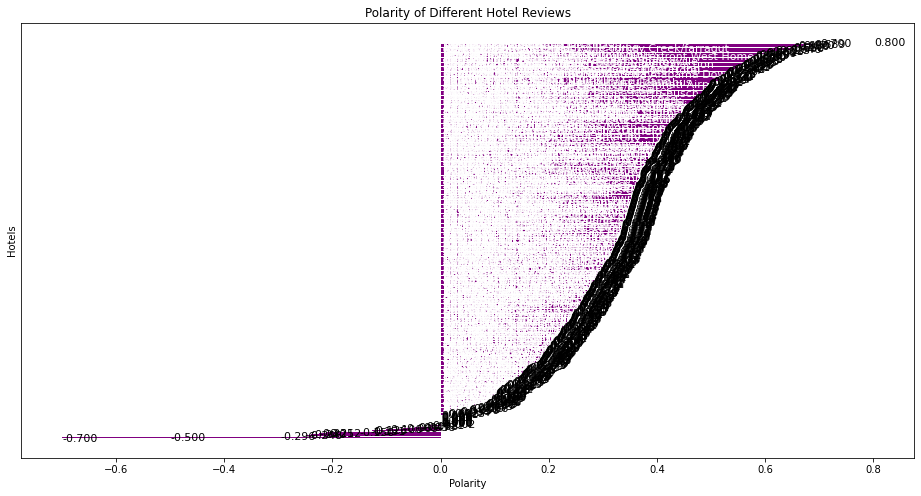

In [31]:
 #plot polarities of reviews for each hotels and their comparision
product_polarity_sorted=pd.DataFrame(review_df.groupby('Hotel')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Hotels')
plt.title('Polarity of Different Hotel Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [32]:
ratings_sum = pd.DataFrame(review_df.groupby(['Hotel_id'])['Rating'].sum()).rename(columns = {'Rating': 'ratings_sum'})
top10 = ratings_sum.sort_values('ratings_sum', ascending = False).head(10)
top10

,ratings_sum
Hotel_id,
9,1082
38,943
95,503
96,450
346,436
56,413
93,410
7,366
50,365


In [33]:
top10_popular=top10.merge(review_df,left_index = True, right_on = 'Hotel_id').drop_duplicates(
    ['Hotel_id', 'Hotel'])[['Hotel_id', 'Hotel','ratings_sum']]

In [34]:
print ('Top 10 Popular Products by sum user ratings\n')
top10_popular

Top 10 Popular Products by sum user ratings



,Hotel_id,Hotel,ratings_sum
2,9,Doubletree By Hilton West Palm Beach Airport,1082
9,38,Doubletree By Hilton Hotel Bay City - Riverfront,943
24,95,Homewood Suites by Hilton Lake Buena Vista-Orl...,503
0,96,JW Marriott Atlanta Buckhead,450
57,346,Honua Kai Resort Spa,436
223,56,Kinzie Hotel,413
108,93,Hotel Abri,410
153,7,Residence Inn By Marriott Irvine John Wayne Ai...,366
33,50,Renaissance Atlanta Waverly Hotel & Convention...,365
32,316,Ocean Park Inn,355


In [35]:
review_df.set_index(['Hotel_id', 'User_id', 'Rating'], append=True)


,,,,Hotel,Address,City,Title,Users,Reviews,Hotel_Type,Price,Hotel_Category,cleaned,lemmatized,polarity
,Hotel_id,User_id,Rating,,,,,,,,,,,,
0,96,6,5,JW Marriott Atlanta Buckhead,3300 Lenox Road NE,Atlanta,Clean Room and Excellent Service,007traveler64,I enjoyed a 2 night stay here recently and wil...,4.0,Rs.14309,"Luxury Hotels,Hotel",i enjoyed a night stay here recently and will ...,enjoy night stay recently surely choice stay a...,0.343509
1,325,16,5,Hotel Sorrento,900 Madison Street,Seattle,Seattle favorite,0x616e63,"Close to everything, charming, classic, modern...",4.0,Rs.12923,"Hotels,Corporate Lodging,Lodging,Hotel,Restaur...",close to everything charming classic modern el...,close charming classic modern elegant wachieve...,0.510000
2,9,20,5,Doubletree By Hilton West Palm Beach Airport,1808 S Australian Ave,West Palm Beach,Family first,103vanessae,"Great place great workers very friendly,clean ...",3.0,Rs.7548,Hotels,great place great workers very friendlyclean w...,great place great worker friendlyclean close d...,0.541667
3,323,27,5,Best Western Plus Pavilions,1176 W Katella Ave,Anaheim,"Location, Comfort, Everything You Could Need",111kristens,Took a trip to Disneyland with 13 family membe...,1.0,Rs.10785,"Hotels Motels,Hotel",took a trip to disneyland with family members ...,take trip disneyland family member summer need...,0.448148
4,55,29,5,The St. Regis New York,Two East 55th Street at Fifth Avenue,New York,Simply Fabulous,112traveler47,"This was our second stay at the St. Regis, and...",5.0,Rs.86653,"Hotels,Hotel",this was our second stay at the st regis and t...,second stay st regis time book american expres...,0.199036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,11,17630,3,Days Inn Warren,210 Ludlow St,Warren,noisy air conditoner hotel,A verified traveler13,We could not keep the water in the shower. It ...,3.0,Rs.5580,Hotels,we could not keep the water in the shower it h...,water shower bow curtain yhe water leak air co...,0.100000
5376,205,17630,5,"Pier 5 Hotel Baltimore, Curio Collection by Hi...",711 Eastern Avenue,Baltimore,Nice location,A verified traveler13,We were very pleased with the room and thought...,3.0,Rs.11614,"Hotel,Hotels,Hotels Motels,Wedding Sites,Meeti...",we were very pleased with the room and thought...,pleased room think location hotel great hassle...,0.457143
5377,207,17630,4,"The Brookshire Suites Inner Harbor, BW Premier...",120 E Lombard St,Baltimore,Nice close to inner harbor.,A verified traveler13,We visited to be close to the theatre and inne...,3.0,Rs.7801,"Hotels,Hotel,Lodging,Hotels Motels,Family-frie...",we visited to be close to the theatre and inne...,visit close theatre inner harbor pleasant stay...,0.366667


In [36]:
ratingsd=review_df.pivot(index='Hotel_id',columns= 'User_id',values='Rating').fillna(0)
ratingsd.head(10)

User_id,6,16,20,27,29,30,33,34,41,46,52,56,59,64,74,75,77,79,81,82,84,88,111,112,114,118,120,121,128,131,135,141,158,167,168,170,171,173,175,178,...,17591,17592,17593,17594,17595,17596,17597,17598,17599,17600,17601,17602,17603,17604,17605,17606,17607,17608,17609,17610,17611,17612,17613,17614,17615,17616,17617,17618,17619,17620,17621,17622,17623,17624,17625,17626,17627,17628,17629,17630
Hotel_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,4.0,3.0,4.0,3.0,2.0,3.0,4.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,3.0,3.0,2.0,3.0,1.0,3.0,5.0,3.0,3.0,3.0,1.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
ratingsd.shape


(501, 4352)

In [38]:
from sklearn.model_selection import train_test_split
traind, testd = train_test_split(ratingsd, test_size=0.30,random_state=42)

In [39]:
train = traind.to_numpy()
test = testd.to_numpy()

In [40]:
sparsity = float(len(train.nonzero()[0]))
sparsity /= (train.shape[0] * train.shape[1])
sparsity *= 100
print ('Sparsity: {:5.2f}%'.format(sparsity))

Sparsity:  0.22%


In [41]:
def item_similarity(Rating, epsilon=1e-9):
    # epsilon -> for handling dived-by-zero errors
    sim = Rating.T.dot(Rating) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [42]:
item_sim = item_similarity(train)


In [43]:
def predict_item(ratings, similarity):
    return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [44]:
item_prediction = predict_item(train, item_sim)


In [45]:
item_prediction[:4, :4]


array([[3.69299226e-12, 1.37884153e-11, 4.05673805e-08, 4.05673805e-08],
       [8.35015140e-11, 3.11767119e-10, 9.17260978e-07, 9.17260978e-07],
       [5.48540577e-11, 2.04806963e-10, 6.02569752e-07, 6.02569752e-07],
       [1.84649613e-12, 6.89420766e-12, 2.02836902e-08, 2.02836902e-08]])

In [46]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [47]:
print ('Item-based CF MSE: ' + str(get_mse(item_prediction, test)))


Item-based CF MSE: 17.378970967239862


In [48]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
r_mat_tr=svd.fit_transform(traind) 
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

#pm=pd.DataFrame(cosine_similarity(r_mat_tr))
#pm.head()
ctrain = cosine_similarity(r_mat_tr)

[0.08281711 0.04226896 0.03890274 0.03520661 0.0349259  0.02767993
 0.0265429  0.02591656 0.02038553 0.01974599 0.01906862 0.01892889
 0.01871051 0.01827376 0.01590788 0.01347877 0.01335111 0.0130709
 0.0121848  0.01198113 0.0115054  0.011515   0.01083509 0.0106237
 0.0102346  0.009892   0.00980561 0.00970397 0.00909492 0.0089367
 0.00871958 0.00817534 0.00811305 0.0079106  0.00773953 0.0073948
 0.00720641 0.00652455 0.00642171 0.00617287 0.00603492 0.0057609
 0.00576671 0.00538951 0.00528585 0.0051083  0.00476518 0.00464246
 0.0046193  0.00443488]
0.7376820323764846


In [49]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
r_mat_tr=svd.fit_transform(testd) 
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

#pmtt=pd.DataFrame(cosine_similarity(r_mat_tr))
#print (pmtt[:2])
#pmtt.head()
ctest = cosine_similarity(r_mat_tr)

[0.13348817 0.06535398 0.04971612 0.047628   0.04528763 0.04391008
 0.0405558  0.03529288 0.03414802 0.0314943  0.03121552 0.03053156
 0.03014604 0.02707558 0.02106276 0.02037632 0.01695501 0.0154944
 0.01462861 0.01369707 0.01346248 0.01198824 0.01193708 0.01164176
 0.01100679 0.01074738 0.01051946 0.00922959 0.00690471 0.00663488
 0.00619439 0.00602921 0.00582863 0.00556119 0.00523992 0.00487292
 0.00463808 0.00465097 0.00457008 0.00402426 0.00343669 0.0029459
 0.00284467 0.00251098 0.00249906 0.00247711 0.00231846 0.00217497
 0.00212339 0.00209147]
0.9291625853144024


In [50]:
print (' CF MSE: ' + str(get_mse(ctrain, ctest)))


 CF MSE: 0.2569055472528425


In [51]:
review_df = review_df.sort_values(by='Rating')
review_df = review_df.reset_index(drop=True)
count_users = review_df.groupby("Users", as_index=False).count()

In [52]:
count = review_df.groupby("Hotel_id", as_index=False).mean()


In [53]:
items_df = count[['Hotel_id']]
items_df.head()
print(len(items_df))

,Hotel_id
0,0
1,1
2,2
3,3
4,4


501


In [54]:
users_df = count_users[['Users']]
users_df.head()
print(len(users_df))

,Users
0,007traveler64
1,0x616e63
2,103vanessae
3,111kristens
4,112traveler47


4352


In [55]:
users_list = users_df.values
len(users_list)

4352

In [56]:
df_clean_matrix = review_df.pivot(index='Hotel_id', columns='Users', values='Rating').fillna(0)
df_clean_matrix = df_clean_matrix.T
R = (df_clean_matrix).to_numpy()
R

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.]])

In [57]:
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
R_demeaned

array([[-0.00998004, -0.00998004, -0.00998004, ..., -0.00998004,
        -0.00998004, -0.00998004],
       [-0.00998004, -0.00998004, -0.00998004, ..., -0.00998004,
        -0.00998004, -0.00998004],
       [-0.00998004, -0.00998004, -0.00998004, ..., -0.00998004,
        -0.00998004, -0.00998004],
       ...,
       [-0.00998004, -0.00998004, -0.00998004, ..., -0.00998004,
        -0.00998004, -0.00998004],
       [-0.00998004, -0.00998004, -0.00998004, ..., -0.00998004,
        -0.00998004, -0.00998004],
       [-0.00598802, -0.00598802,  2.99401198, ..., -0.00598802,
        -0.00598802, -0.00598802]])

In [58]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned)

In [59]:
sigma = np.diag(sigma)


In [60]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_clean_matrix.columns)
preds_df['Users'] = users_df
preds_df.set_index('Users', inplace=True)
preds_df.head()

Hotel_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500
Users,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
007traveler64,0.001011,-0.000233,0.004826,0.001711,-0.002002,-0.021448,0.005843,-0.000733,0.001007,0.001631,-0.001035,-0.033369,0.007347,0.010449,-0.003490,-0.017024,-0.007517,-0.002294,0.009029,-0.000281,-0.006628,-0.001969,-0.000803,0.000080,-0.001955,0.013367,-0.005702,0.000939,0.000012,0.001073,0.001688,0.000079,0.030086,0.000557,0.000346,-0.025701,-0.000463,-0.000112,-0.003841,0.000007,...,-0.001347,0.000616,0.000894,0.000953,-0.000042,-0.003798,0.000890,0.000860,0.000894,0.000939,0.001011,0.000894,0.000894,0.000434,0.000939,0.000401,0.000815,0.000894,-0.002511,-0.001733,0.000894,0.001112,0.000344,0.000815,0.000860,0.000890,0.000860,0.000333,0.000472,0.000894,-0.000846,0.000144,0.000973,0.000973,0.000815,0.000769,0.000116,0.000845,0.000594,0.000939
0x616e63,0.010648,0.010689,-0.001863,0.006236,0.010736,-0.005214,-0.002450,-0.003456,0.010648,-0.001656,0.005871,0.008979,-0.003879,-0.005950,0.010697,0.010714,0.010837,0.010726,-0.000374,0.010688,0.004414,0.010738,0.010704,0.010679,0.010773,-0.003966,0.010825,0.010651,0.010680,0.001718,-0.004852,0.010679,-0.009909,0.010663,0.010670,-0.000343,0.010691,0.008101,-0.000418,0.010680,...,0.009618,0.010661,0.010652,0.010650,0.010683,0.009510,0.010652,0.010653,0.010652,0.010651,0.010648,0.010652,0.010652,0.010667,0.010651,0.010668,0.010655,0.010652,0.008990,0.010732,0.010652,0.010492,0.010476,0.010655,0.010653,0.010652,0.010653,0.010617,0.010666,0.010652,0.009589,0.010143,0.010649,0.010649,0.010655,0.010656,0.010495,0.010654,0.010662,0.010651
103vanessae,-0.001355,-0.001502,-0.017514,0.042499,0.007945,0.153144,-0.047335,0.012036,-0.001356,4.979298,0.041061,-0.016152,0.037116,-0.060402,0.017156,-0.001198,-0.001609,-0.001486,0.000109,-0.001493,0.065647,-0.001585,-0.001372,-0.001471,0.009964,-0.110345,-0.001637,-0.001366,-0.001472,0.029161,0.106331,-0.001473,-0.076990,-0.001417,-0.001442,0.040235,-0.001455,0.033937,-0.000052,-0.001430,...,0.033463,-0.001408,-0.001372,-0.001364,-0.001487,0.037895,-0.001373,-0.001377,-0.001372,-0.001366,-0.001355,-0.001372,-0.001372,-0.001432,-0.001366,-0.001436,-0.001383,-0.001372,0.017926,-0.001603,-0.001372,-0.003965,0.001712,-0.001383,-0.001377,-0.001373,-0.001377,-0.002482,-0.001427,-0.001372,0.015008,0.007184,-0.001361,-0.001361,-0.001383,-0.001389,-0.001425,-0.001379,-0.001412,-0.001366
111kristens,0.010593,0.010632,-0.002189,0.006322,0.010723,-0.004785,-0.002917,-0.003652,0.010593,0.022054,0.005942,0.008791,-0.003973,-0.006531,0.010724,0.010685,0.010774,0.010668,-0.000583,0.010632,0.004579,0.010679,0.010647,0.010622,0.010767,-0.004759,0.010763,0.010595,0.010624,0.001668,-0.004622,0.010622,-0.010619,0.010608,0.010614,-0.000386,0.010634,0.008175,-0.001024,0.010624,...,0.009711,0.010606,0.010597,0.010595,0.010626,0.009620,0.010597,0.010598,0.010597,0.010595,0.010593,0.010597,0.010597,0.010611,0.010595,0.010613,0.010599,0.010597,0.008998,0.010673,0.010597,0.010423,0.010432,0.010599,0.010598,0.010597,0.010598,0.010556,0.010610,0.010597,0.009593,0.010120,0.010594,0.010594,0.010599,0.010601,0.010466,0.010598,0.010606,0.010595
112traveler47,0.010765,0.010816,-0.003662,0.005708,0.010878,-0.007474,-0.004432,-0.005597,0.010766,-0.001492,0.005289,0.008902,-0.005956,-0.008468,0.010857,0.010806,0.011006,0.010864,-0.001981,0.010815,0.003597,0.010877,0.010835,0.010803,0.010944,-0.006170,0.010988,0.010768,0.010805,0.000496,-0.007118,0.010804,-0.013042,0.010784,0.010793,-0.001905,0.010819,0.007843,0.001073,0.010805,...,0.009597,0.010782,0.010770,0.010768,0.010808,0.009482,0.010771,0.010772,0.010770,0.010768,0.010765,0.010770,0.010770,0.010789,0.010768,0.010791,0.010774,0.010770,0.008868,0.010870,0.01077

In [61]:
preds_df.shape


(4352, 501)

In [62]:
def recommend_it(predictions_df, itm_df, original_ratings_df, num_recommendations=10,rUsers='112traveler47'):
    
    # Get and sort the user's predictions
    sorted_user_predictions = predictions_df.loc[rUsers].sort_values(ascending=False)
    
    # Get the user's data and merge in the item information.
    user_data = original_ratings_df[original_ratings_df.Users == rUsers]
    user_full = (user_data.merge(itm_df, how = 'left', left_on = 'Hotel_id', right_on = 'Hotel_id').
                     sort_values(['Rating'], ascending=False)
                 )

    print ('User {0} has already stayed in {1} hotel.'.format(rUsers, user_full.shape[0]))
    print ('Recommending the highest {0} predicted  hotels never opted for the stay.'.format(num_recommendations))
    
    # Recommend the highest predicted rating items that the user hasn't bought yet.
    recommendations = (itm_df[~itm_df['Hotel_id'].isin(user_full['Hotel_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'Hotel_id',
               right_on = 'Hotel_id').
         rename(columns = {rUsers: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )
    topk=recommendations.merge(original_ratings_df,left_index = True, right_on = 'Hotel_id',left_on='Hotel_id').drop_duplicates(
    ['Hotel_id', 'Hotel'])[['Hotel_id', 'Hotel']]

    return topk

In [63]:
recommend_it(preds_df, items_df, review_df, 10)


User 112traveler47 has already stayed in 1 hotel.
Recommending the highest 10 predicted  hotels never opted for the stay.


,Hotel_id,Hotel
17,93,Hotel Abri
399,316,Ocean Park Inn
34,50,Renaissance Atlanta Waverly Hotel & Convention...
126,313,The Orchard Garden Hotel
33,47,Best Western Mission Bay
1317,90,Orchid Key Inn
373,335,Best Western Plus Bayside Inn
1050,287,"The Westin Nanea Ocean Villas, Ka'anapali"
166,334,Best Western Plus Hacienda Hotel Old Town
416,314,Fairfield Inn & Suites by Marriott Key West at...
